# Data Quality Assessment Check

# Import useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import plotly.express as px
import seaborn as sns
#set seaborn style for plots
sns.set_style('darkgrid')
from operator import attrgetter
#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
# Remove warning signs in output cells
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the xlsx dataset
Transact_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions')
NewCustomer_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')
Demograph_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic')
Address_df=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress')

# Transactions dataset

In [3]:
Transact_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                     transaction_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  3                                                                                                                              
4                                                  4                                                                                                                              

   Unnamed: 1   Unnamed: 2           Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0  product_id  customer_id     transaction_date  online_order  order_status   
1           2         2950  2017-02-25 00:00:00         False      Approved   
2           3         3120  2017-05-21 00:00:00          True      Approved   
3          37          402  2017-10-16 00:00:00         False      Approved   
4          88         3135  2017-08-31 00:00:00         False      Approved   

       Unnamed: 6    Unnamed: 7     Unnamed: 8    Unnamed: 9 Unnamed: 10  \
0           brand  product_line  product_class  product_size  list_price   
1           Solex      Standard         medium        medium       71.49   
2   Trek Bicycles      Standard         medium         large     2091.47   
3      OHM Cycles      Standard            low        medium     1793.43   
4  Norco Bicycles      Standard         medium        medium     1198.46   

     Unnamed: 11              Unnamed: 12  
0  standard_cost  product_first_sold_date  
1          53.62                    41245  
2         388.92                    41701  
3         248.82                    36361  
4          381.1                    36145

In [4]:
#Correctly set indexes and columns of sheets
def arrange_data(df):
    df.columns = df.iloc[0]
    df.drop(index=0, inplace=True)
    return df
    

In [5]:
Transact_df = arrange_data(Transact_df)
Transact_df.head()

0 transaction_id product_id customer_id     transaction_date online_order  \
1              1          2        2950  2017-02-25 00:00:00        False   
2              2          3        3120  2017-05-21 00:00:00         True   
3              3         37         402  2017-10-16 00:00:00        False   
4              4         88        3135  2017-08-31 00:00:00        False   
5              5         78         787  2017-10-01 00:00:00         True   

0 order_status           brand product_line product_class product_size  \
1     Approved           Solex     Standard        medium       medium   
2     Approved   Trek Bicycles     Standard        medium        large   
3     Approved      OHM Cycles     Standard           low       medium   
4     Approved  Norco Bicycles     Standard        medium       medium   
5     Approved  Giant Bicycles     Standard        medium        large   

0 list_price standard_cost product_first_sold_date  
1      71.49         53.62                   41245  
2    2091.47        388.92                   41701  
3    1793.43        248.82                   36361  
4    1198.46         381.1                   36145  
5     1765.3        709.48                   42226

In [6]:
#Check for the shape of the data
print('The Transactions data contains {} rows (observations) and {} columns (features).'.format(Transact_df.shape[0],Transact_df.shape[1]))

The Transactions data contains 20000 rows (observations) and 13 columns (features).


In [7]:
Transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


The online_order, brand, product_line, product_class, product_size, standard_cost, product_first_sold_date columns have missing values.

Several columns have incorrect datatypes.
- Numerical columns- product_id, customer_id,list_price, standard_cost
- Categorical columns- online_order, order_status, brand, product_line, product_class, product_size

In [8]:
Transact_df[['product_id', 'customer_id']] = Transact_df[['product_id', 'customer_id']].astype('int32')
Transact_df[['list_price', 'standard_cost']] = Transact_df[['list_price', 'standard_cost']].astype('float')
Transact_df[['online_order']] = Transact_df[['online_order']].astype('bool')
Transact_df[['order_status']] = Transact_df[['order_status']].astype('bool')

In [9]:
Transact_df['transaction_date']=pd.to_datetime(Transact_df['transaction_date'])

The product_first_sold_date column is irrelevant since its values are invalid.

In [10]:
#Drop the irrelevant column
Transact_df.drop(columns='product_first_sold_date', inplace=True)

In [11]:
Transact_df.describe()

0       product_id   customer_id    list_price  standard_cost
count  20000.00000  20000.000000  20000.000000   19803.000000
mean      45.36465   1738.246050   1107.829449     556.046951
std       30.75359   1011.951046    582.825242     405.955660
min        0.00000      1.000000     12.010000       7.210000
25%       18.00000    857.750000    575.270000     215.140000
50%       44.00000   1736.000000   1163.890000     507.580000
75%       72.00000   2613.000000   1635.300000     795.100000
max      100.00000   5034.000000   2091.470000    1759.850000

In [12]:
Transact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    20000 non-null  object        
 1   product_id        20000 non-null  int32         
 2   customer_id       20000 non-null  int32         
 3   transaction_date  20000 non-null  datetime64[ns]
 4   online_order      20000 non-null  bool          
 5   order_status      20000 non-null  bool          
 6   brand             19803 non-null  object        
 7   product_line      19803 non-null  object        
 8   product_class     19803 non-null  object        
 9   product_size      19803 non-null  object        
 10  list_price        20000 non-null  float64       
 11  standard_cost     19803 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(2), int32(2), object(5)
memory usage: 1.4+ MB


# NewCustomerList

In [13]:
NewCustomer_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                         first_name                                                                                                                              
1                                            Chickie                                                                                                                              
2                                              Morly                                                                                                                              
3                                            Ardelis                                                                                                                              
4                                             Lucine                                                                                                                              

  Unnamed: 1 Unnamed: 2                           Unnamed: 3  \
0  last_name     gender  past_3_years_bike_related_purchases   
1    Brister       Male                                   86   
2     Genery       Male                                   69   
3  Forrester     Female                                   10   
4      Stutt     Female                                   64   

            Unnamed: 4                  Unnamed: 5             Unnamed: 6  \
0                  DOB                   job_title  job_industry_category   
1           1957-07-12             General Manager          Manufacturing   
2           1970-03-22         Structural Engineer               Property   
3  1974-08-28 00:00:00      Senior Cost Accountant     Financial Services   
4           1979-01-28  Account Representative III          Manufacturing   

          Unnamed: 7          Unnamed: 8 Unnamed: 9  ... Unnamed: 13  \
0     wealth_segment  deceased_indicator   owns_car  ...       state   
1      Mass Customer                   N        Yes  ...         QLD   
2      Mass Customer                   N         No  ...         NSW   
3  Affluent Customer                   N         No  ...         VIC   
4  Affluent Customer                   N        Yes  ...         QLD   

  Unnamed: 14         Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  \
0     country  property_valuation         NaN         NaN         NaN   
1   Australia                   6        0.56      0.7000      0.8750   
2   Australia                  11        0.89      0.8900      1.1125   
3   Australia                   5        1.01      1.0100      1.0100   
4   Australia                   1        0.87      1.0875      1.0875   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  
0          NaN          NaN         Rank        Value  
1     0.743750          1.0            1      1.71875  
2     0.945625          1.0            1      1.71875  
3     1.010000          1.0            1      1.71875  
4     1.087500          4.0            4     1.703125  

[5 rows x 23 columns]

In [14]:
NewCustomer_df=arrange_data(NewCustomer_df)
NewCustomer_df.head()

0 first_name  last_name  gender past_3_years_bike_related_purchases  \
1    Chickie    Brister    Male                                  86   
2      Morly     Genery    Male                                  69   
3    Ardelis  Forrester  Female                                  10   
4     Lucine      Stutt  Female                                  64   
5    Melinda     Hadlee  Female                                  34   

0                  DOB                   job_title job_industry_category  \
1           1957-07-12             General Manager         Manufacturing   
2           1970-03-22         Structural Engineer              Property   
3  1974-08-28 00:00:00      Senior Cost Accountant    Financial Services   
4           1979-01-28  Account Representative III         Manufacturing   
5           1965-09-21           Financial Analyst    Financial Services   

0     wealth_segment deceased_indicator owns_car  ... state    country  \
1      Mass Customer                  N      Yes  ...   QLD  Australia   
2      Mass Customer                  N       No  ...   NSW  Australia   
3  Affluent Customer                  N       No  ...   VIC  Australia   
4  Affluent Customer                  N      Yes  ...   QLD  Australia   
5  Affluent Customer                  N       No  ...   NSW  Australia   

0 property_valuation   NaN     NaN     NaN       NaN  NaN  Rank     Value  
1                  6  0.56  0.7000  0.8750  0.743750  1.0     1   1.71875  
2                 11  0.89  0.8900  1.1125  0.945625  1.0     1   1.71875  
3                  5  1.01  1.0100  1.0100  1.010000  1.0     1   1.71875  
4                  1  0.87  1.0875  1.0875  1.087500  4.0     4  1.703125  
5                  9  0.52  0.5200  0.6500  0.650000  4.0     4  1.703125  

[5 rows x 23 columns]

In [15]:
NewCustomer_df.columns

Index([                         'first_name',
                                 'last_name',
                                    'gender',
       'past_3_years_bike_related_purchases',
                                       'DOB',
                                 'job_title',
                     'job_industry_category',
                            'wealth_segment',
                        'deceased_indicator',
                                  'owns_car',
                                    'tenure',
                                   'address',
                                  'postcode',
                                     'state',
                                   'country',
                        'property_valuation',
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                         nan,
                                  

Five columns are labeled 'nan' therefore making its values irrelevant.

In [16]:
NewCustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   object 
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   object 
 11  address                       

In [17]:
# Correct data types
NewCustomer_df[['past_3_years_bike_related_purchases','property_valuation','Rank']]=NewCustomer_df[['past_3_years_bike_related_purchases','property_valuation','Rank']].astype('int')
NewCustomer_df['Value']=NewCustomer_df['Value'].astype('float')
NewCustomer_df['DOB']=pd.to_datetime(NewCustomer_df['DOB'])

In [18]:
#Visualize the percentage of null values
((NewCustomer_df.isnull().sum()/len(NewCustomer_df))*100)

0
first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
NaN                                     0.0
NaN                                     0.0
NaN                                     0.0
NaN                                     0.0
NaN                                     0.0
Rank                                    0.0
Value                         

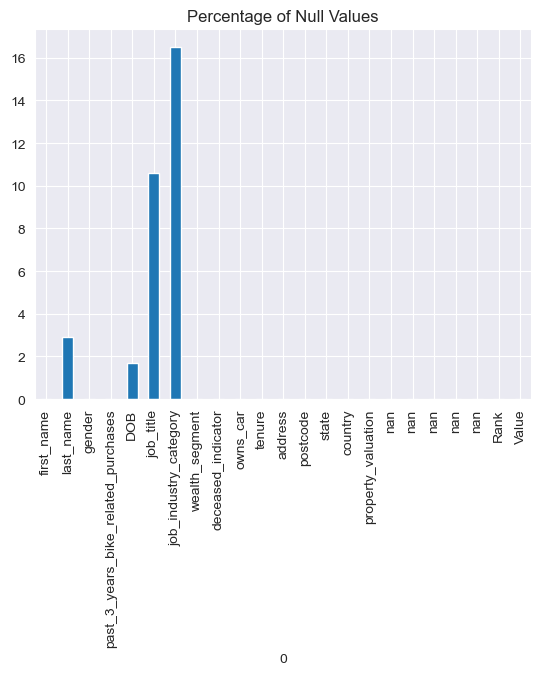

In [19]:
((NewCustomer_df.isnull().sum()/len(NewCustomer_df))*100).plot(
    kind='bar',title='Percentage of Null Values'
);

About 3% of the data in the last_name column is missing even though no data is missing in the first_name column. Less than 2% of data in DOB is missing. The job_title and job_industry_category columns have a significant amount of missing values about 11% and 17% respectively.

In [20]:
#Check the descriptive statistics
NewCustomer_df.describe()

0      past_3_years_bike_related_purchases  property_valuation          NaN  \
count                          1000.000000         1000.000000  1000.000000   
mean                             49.836000            7.397000     0.747340   
std                              27.796686            2.758804     0.205082   
min                               0.000000            1.000000     0.400000   
25%                              26.750000            6.000000     0.570000   
50%                              51.000000            8.000000     0.750000   
75%                              72.000000            9.000000     0.920000   
max                              99.000000           12.000000     1.100000   

0              NaN          NaN          NaN          NaN         Rank  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.839005     0.942673     0.870514   498.819000   498.819000   
std       0.248858     0.294832     0.280891   288.810997   288.810997   
min       0.400000     0.400000     0.340000     1.000000     1.000000   
25%       0.637500     0.712500     0.658750   250.000000   250.000000   
50%       0.820000     0.912500     0.842625   500.000000   500.000000   
75%       1.031875     1.142969     1.062500   750.250000   750.250000   
max       1.375000     1.718750     1.718750  1000.000000  1000.000000   

0            Value  
count  1000.000000  
mean      0.881714  
std       0.293525  
min       0.340000  
25%       0.649531  
50%       0.860000  
75%       1.075000  
max       1.718750

In [21]:
NewCustomer_df['DOB'].sort_values(ascending=True)

798   1938-06-08
886   1938-06-09
770   1938-08-05
586   1938-08-30
266   1938-08-31
         ...    
776          NaT
836          NaT
884          NaT
905          NaT
985          NaT
Name: DOB, Length: 1000, dtype: datetime64[ns]

Some the date types are not consistent.

# Customer Demographics

In [22]:
Demograph_df=arrange_data(Demograph_df)
Demograph_df.head()

0 customer_id      first_name  last_name  gender  \
1           1         Laraine  Medendorp       F   
2           2             Eli    Bockman    Male   
3           3           Arlin     Dearle    Male   
4           4          Talbot        NaN    Male   
5           5  Sheila-kathryn     Calton  Female   

0 past_3_years_bike_related_purchases                  DOB  \
1                                  93  1953-10-12 00:00:00   
2                                  81  1980-12-16 00:00:00   
3                                  61  1954-01-20 00:00:00   
4                                  33  1961-10-03 00:00:00   
5                                  56  1977-05-13 00:00:00   

0               job_title job_industry_category     wealth_segment  \
1     Executive Secretary                Health      Mass Customer   
2  Administrative Officer    Financial Services      Mass Customer   
3      Recruiting Manager              Property      Mass Customer   
4                     NaN                    IT      Mass Customer   
5           Senior Editor                   NaN  Affluent Customer   

0 deceased_indicator                                            default  \
1                  N                                                 "'   
2                  N                       <script>alert('hi')</script>   
3                  N                                2018-02-01 00:00:00   
4                  N  () { _; } >_[$($())] { touch /tmp/blns.shellsh...   
5                  N                                                NIL   

0 owns_car tenure  
1      Yes     11  
2      Yes     16  
3      Yes     15  
4       No      7  
5      Yes      8

In [23]:
Demograph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [24]:
#Correct the data types
Demograph_df[['past_3_years_bike_related_purchases']]=Demograph_df[['past_3_years_bike_related_purchases']].astype('int')
Demograph_df['DOB']=pd.to_datetime(Demograph_df['DOB'])

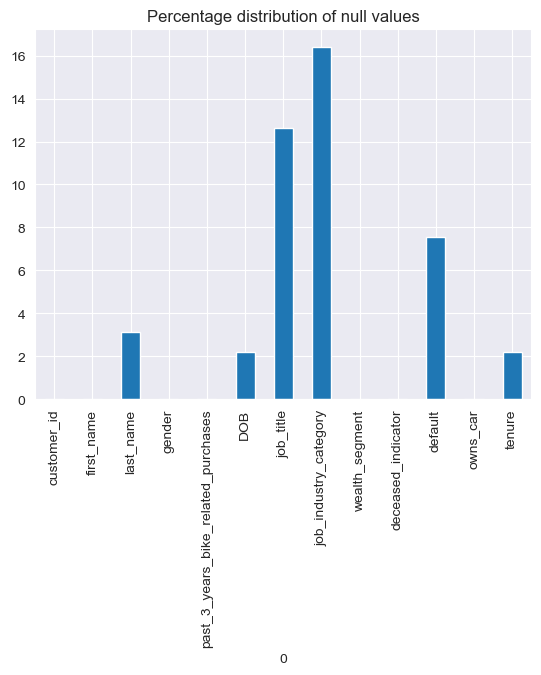

In [25]:
#Check for percentage of null values
(((Demograph_df.isnull().sum())/len(Demograph_df))*100).plot(
    kind='bar',title='Percentage distribution of null values'
);

About 3% of the data in the last_name column is missing even though no data is missing in the first_name column, same thing occurs in the NewCustomer dataset. About 2% of data in DOB is missing which is a bit more compared to the NewCustomer dataset. The job_title and job_industry_category columns have a significant amount of missing values about 13% and 17% respectively.

In [26]:
Demograph_df['DOB'].sort_values(ascending=True)

34     1843-12-21
720    1931-10-23
1092   1935-08-22
3410   1940-09-22
2413   1943-08-11
          ...    
3779          NaT
3883          NaT
3931          NaT
3935          NaT
3998          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

Some dates are inconsistent. The date 1843-12-21 is unrealistic.

In [27]:
Demograph_df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [28]:
Demograph_df.groupby('gender')['first_name'].count()

gender
F            1
Femal        1
Female    2037
M            1
Male      1872
U           88
Name: first_name, dtype: int64

Some of the values entered for gender are incosistent.

In [29]:
Demograph_df['default'].unique()

array(['"\'', "<script>alert('hi')</script>",
       datetime.datetime(2018, 2, 1, 0, 0),
       '() { _; } >_[$($())] { touch /tmp/blns.shellshock2.fail; }',
       'NIL', 'ðµ ð ð ð', 'â°â´âµâââ', '(â¯Â°â¡Â°ï¼â¯ï¸µ â»ââ»)', '0/0',
       'ð©ð½', 'ÅâÂ´Â®â\xa0Â¥Â¨ËÃ¸Ïââ', 'nil', -100, 'â°â´âµ', 'ð',
       1000000000000000049861653971908893017010268485438462151574892930611988399099305815384459015356416,
       'ï¾ï½¥â¿ã¾â²(ï½¡ââ¿âï½¡)â±â¿ï½¥ï¾', 'Î©âÃ§ââ«ËÂµâ¤â¥Ã·',
       'ÅâÂ´â°ËÃÂ¨ËÃâââ', 'ï¼ï¼ï¼',
       '../../../../../../../../../../../etc/hosts',
       '×Ö¸×Ö°×ªÖ¸×testØ§ÙØµÙØ\xadØ§Øª Ø§ÙØªÙØ\xadÙÙ', '<>?:"{}|_+',
       '\'\'\'\'"', ",./;'[]\\-=",
       '() { 0; }; touch /tmp/blns.shellshock1.fail;',
       'ì¬íê³¼íì ì´íì°êµ¬ì', 'testâ\xa0testâ«',
       '0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â£ 8ï¸â£ 9ï¸â£ ð',
       nan, '!@#$%^&*()', "'",
       'Ì¦HÍÌ¬Ì¤ÌÌ¤eÍ ÍÌÌ¥ÌÌ»ÍÌwÌhÌÌ¯ÍoÌÍÌÍÌ±Ì® ÒÌºÌÌÌÍWÌ·Ì¼Ì\xadaÌºÌªÍiÌ¨ÍÍÌ\xadÍÌ¯ÌtÌ¶Ì¼Ì®sÌÌÍÍ Ì\xa0Ì«Ì\xa0BÌ»ÍÍÍÍÌ³eÌµhÌµÌ¬ÍÌ«Í

The default column does not give useful information.

# Customer Address

In [30]:
Address_df=arrange_data(Address_df)
Address_df.head()

0 customer_id              address postcode            state    country  \
1           1   060 Morning Avenue     2016  New South Wales  Australia   
2           2  6 Meadow Vale Court     2153  New South Wales  Australia   
3           4   0 Holy Cross Court     4211              QLD  Australia   
4           5  17979 Del Mar Point     2448  New South Wales  Australia   
5           6     9 Oakridge Court     3216              VIC  Australia   

0 property_valuation  
1                 10  
2                 10  
3                  9  
4                  4  
5                  9

In [31]:
Address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [32]:
Address_df.shape

(3999, 6)

In [33]:
Address_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [34]:
Address_df['len_postcode']=Address_df['postcode'].apply(lambda x:len(str(x)))

# Customer Segmentation of the New Customers

In [35]:
# Join the 3 datasets on the customer_id column
df_intermediate = pd.merge(Demograph_df, Transact_df, on="customer_id", how='left')
df = pd.merge(df_intermediate, Address_df, on="customer_id", how='left')
df.head()

0 customer_id first_name  last_name gender  \
0           1    Laraine  Medendorp      F   
1           1    Laraine  Medendorp      F   
2           1    Laraine  Medendorp      F   
3           1    Laraine  Medendorp      F   
4           1    Laraine  Medendorp      F   

0  past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

0 job_industry_category wealth_segment deceased_indicator  ... product_class  \
0                Health  Mass Customer                  N  ...        medium   
1                Health  Mass Customer                  N  ...        medium   
2                Health  Mass Customer                  N  ...           low   
3                Health  Mass Customer                  N  ...        medium   
4                Health  Mass Customer                  N  ...        medium   

0 product_size list_price standard_cost             address postcode  \
0       medium     235.63        125.07  060 Morning Avenue     2016   
1       medium    1577.53        826.51  060 Morning Avenue     2016   
2        small    1720.70       1531.42  060 Morning Avenue     2016   
3       medium     360.40        270.30  060 Morning Avenue     2016   
4       medium      71.49         53.62  060 Morning Avenue     2016   

0            state    country property_valuation len_postcode  
0  New South Wales  Australia                 10          4.0  
1  New South Wales  Australia                 10          4.0  
2  New South Wales  Australia                 10          4.0  
3  New South Wales  Australia                 10          4.0  
4  New South Wales  Australia                 10          4.0  

[5 rows x 30 columns]

In [36]:
#Quick preview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20504 entries, 0 to 20503
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          20504 non-null  object        
 1   first_name                           20504 non-null  object        
 2   last_name                            19849 non-null  object        
 3   gender                               20504 non-null  object        
 4   past_3_years_bike_related_purchases  20504 non-null  int32         
 5   DOB                                  20047 non-null  datetime64[ns]
 6   job_title                            18027 non-null  object        
 7   job_industry_category                17180 non-null  object        
 8   wealth_segment                       20504 non-null  object        
 9   deceased_indicator                   20504 non-null  object        
 10  default   

## Data Cleaning

In [37]:
#Lets define a function to give info of null_values
def df_info(df=df):
    df_info=pd.DataFrame(index=df.columns)
    df_info['data_type'] = df.dtypes
    df_info['null_count'] = df.isnull().sum()
    df_info['null_percentage %'] = (df.isnull().sum()/len(df))*100
    df_info['unique_count'] = df.nunique()
    return df_info

In [38]:
df_info()

data_type  null_count  \
0                                                                 
customer_id                                  object           0   
first_name                                   object           0   
last_name                                    object         655   
gender                                       object           0   
past_3_years_bike_related_purchases           int32           0   
DOB                                  datetime64[ns]         457   
job_title                                    object        2477   
job_industry_category                        object        3324   
wealth_segment                               object           0   
deceased_indicator                           object           0   
default                                      object        1499   
owns_car                                     object           0   
tenure                                       object         457   
transaction_id                               object         507   
product_id                                  float64         507   
transaction_date                     datetime64[ns]         507   
online_order                                 object         507   
order_status                                 object         507   
brand                                        object         704   
product_line                                 object         704   
product_class                                object         704   
product_size                                 object         704   
list_price                                  float64         507   
standard_cost                               float64         704   
address                                      object          29   
postcode                                     object          29   
state                                        object          29   
country                                      object          29   
property_valuation                           object          29   
len_postcode                                float64          29   

                                     null_percentage %  unique_count  
0                                                                     
customer_id                                   0.000000          4000  
first_name                                    0.000000          3139  
last_name                                     3.194499          3725  
gender                                        0.000000             6  
past_3_years_bike_related_purchases           0.000000           100  
DOB                                           2.228833          3448  
job_title                                    12.080570           195  
job_industry_category                        16.211471             9  
wealth_segment                                0.000000             3  
deceased_indicator                            0.000000             2  
default                                       7.310769            90  
owns_car                                      0.000000             2  
tenure                                        2.228833            22  
transaction_id                                2.472688         19997  
product_id                                    2.472688           101  
transaction_date                              2.472688           364  
online_order                                  2.472688             2  
order_status                                  2.472688             1  
brand                                         3.433476             6  
product_line                                  3.433476             4  
product_class                                 3.433476             3  
product_size                                  3.433476             3  
list_price                                    2.472688           296  
standard_cost                                 3.433476           100  
address                                       0.141

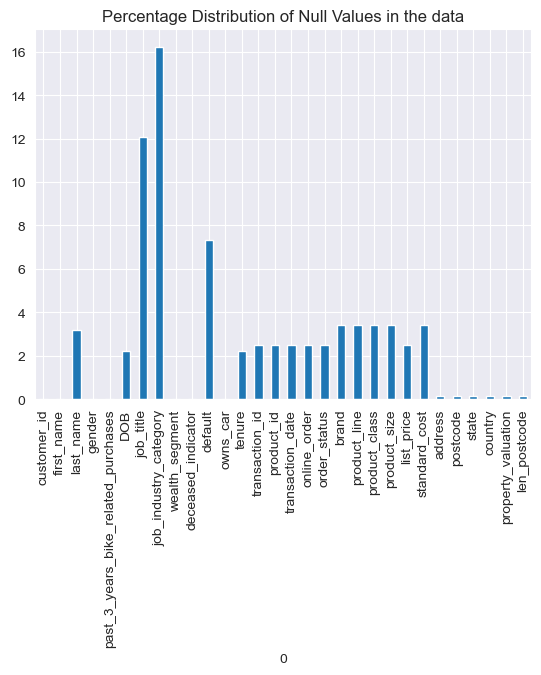

In [39]:
# Visualize percentage distribution of null values
((df.isnull().sum()/len(df))*100).plot(
    kind='bar', title="Percentage Distribution of Null Values in the data"
);

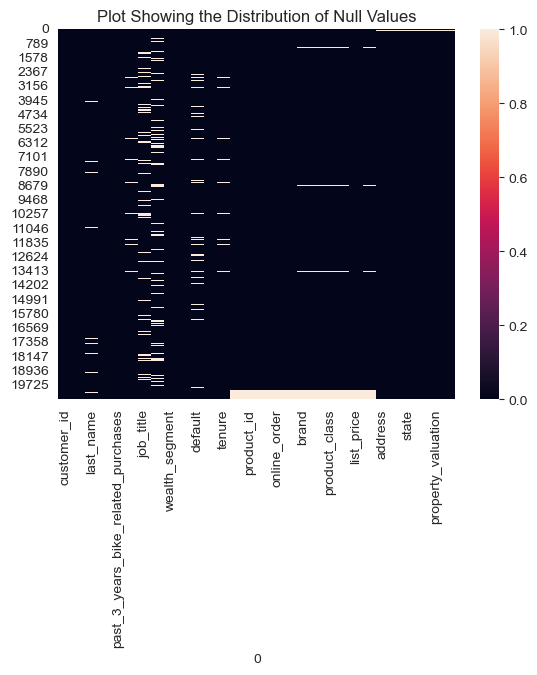

In [40]:
sns.heatmap(df.isnull())
plt.title('Plot Showing the Distribution of Null Values');

In [41]:
# The features with equal percantage of missing data jointly do not provide useful info for the same data point
# Lets drop them
df.dropna(subset=['transaction_id','product_id','transaction_date','online_order','order_status'],inplace=True)
df.dropna(subset=['brand','product_line', 'product_class','product_size'],inplace=True)
df.dropna(subset=['address', 'postcode', 'state', 'country','property_valuation', 'len_postcode'],inplace=True)
df.dropna(subset=['tenure','DOB'],inplace=True)

In [42]:
# Replace Nan values in the last_name, job_title column with '-'
df['last_name'].fillna('-', inplace=True)
df['job_title'].fillna('Not specified', inplace=True)
df['job_industry_category'].fillna('Not specified', inplace=True)

In [43]:
# Drop the default column since it provides no useful information
df.drop(columns='default', inplace=True)

In [44]:
#Check for unique gender values
df['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [45]:
df['gender'].value_counts()

Female    9890
Male      9413
F           11
U            8
Femal        7
M            6
Name: gender, dtype: int64

In [46]:
#Drop the custom U gender input and correct the invalid gender inputs
df['gender']=df['gender'].apply(lambda x:'Male' if x == 'M' else x)
df['gender']=df['gender'].apply(lambda x:'Female' if x == 'F' else x)
df['gender']=df['gender'].apply(lambda x:'Female' if x == 'Femal' else x)
df = df[df['gender'] != 'U']

In [47]:
# Correct the data types
df['tenure']=df['tenure'].astype('int')
df['property_valuation']=df['property_valuation'].astype('int')

In [48]:
#Drop columns with no information
df.drop(columns=['len_postcode','country','order_status'], inplace=True)

In [49]:
df_info()

data_type  null_count  \
0                                                                 
customer_id                                  object           0   
first_name                                   object           0   
last_name                                    object           0   
gender                                       object           0   
past_3_years_bike_related_purchases           int32           0   
DOB                                  datetime64[ns]           0   
job_title                                    object           0   
job_industry_category                        object           0   
wealth_segment                               object           0   
deceased_indicator                           object           0   
owns_car                                     object           0   
tenure                                       object           0   
transaction_id                               object           0   
product_id                                  float64           0   
transaction_date                     datetime64[ns]           0   
online_order                                 object           0   
order_status                                 object           0   
brand                                        object           0   
product_line                                 object           0   
product_class                                object           0   
product_size                                 object           0   
list_price                                  float64           0   
standard_cost                               float64           0   
address                                      object           0   
postcode                                     object           0   
state                                        object           0   
country                                      object           0   
property_valuation                           object           0   
len_postcode                                float64           0   

                                     null_percentage %  unique_count  
0                                                                     
customer_id                                        0.0          3413  
first_name                                         0.0          2778  
last_name                                          0.0          3195  
gender                                             0.0             3  
past_3_years_bike_related_purchases                0.0           100  
DOB                                                0.0          3047  
job_title                                          0.0           196  
job_industry_category                              0.0            10  
wealth_segment                                     0.0             3  
deceased_indicator                                 0.0             2  
owns_car                                           0.0             2  
tenure                                             0.0            22  
transaction_id                                     0.0         19335  
product_id                                         0.0           101  
transaction_date                                   0.0           364  
online_order                                       0.0             2  
order_status                                       0.0             1  
brand                                              0.0             6  
product_line                                       0.0             4  
product_class                                      0.0             3  
product_size                                       0.0             3  
list_price                                         0.0           100  
standard_cost                                      0.0           100  
address                                            0.0          3411  
postcode                                           0.0           829  
state                                          

# EDA (Exploratory Data Analysis)

In [50]:
# General preview of the dataset
df.head()

0 customer_id first_name  last_name  gender  \
0           1    Laraine  Medendorp  Female   
1           1    Laraine  Medendorp  Female   
2           1    Laraine  Medendorp  Female   
3           1    Laraine  Medendorp  Female   
4           1    Laraine  Medendorp  Female   

0  past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

0 job_industry_category wealth_segment deceased_indicator  ...  \
0                Health  Mass Customer                  N  ...   
1                Health  Mass Customer                  N  ...   
2                Health  Mass Customer                  N  ...   
3                Health  Mass Customer                  N  ...   
4                Health  Mass Customer                  N  ...   

0           brand  product_line product_class  product_size list_price  \
0      OHM Cycles      Standard        medium        medium     235.63   
1           Solex      Standard        medium        medium    1577.53   
2   Trek Bicycles          Road           low         small    1720.70   
3  Norco Bicycles      Standard        medium        medium     360.40   
4           Solex      Standard        medium        medium      71.49   

0 standard_cost             address postcode            state  \
0        125.07  060 Morning Avenue     2016  New South Wales   
1        826.51  060 Morning Avenue     2016  New South Wales   
2       1531.42  060 Morning Avenue     2016  New South Wales   
3        270.30  060 Morning Avenue     2016  New South Wales   
4         53.62  060 Morning Avenue     2016  New South Wales   

0 property_valuation  
0                 10  
1                 10  
2                 10  
3                 10  
4                 10  

[5 rows x 26 columns]

In [51]:
# Statistical preview of the dataset
df.describe()

0      past_3_years_bike_related_purchases        tenure    product_id  \
count                         19327.000000  19327.000000  19327.000000   
mean                             48.937135     10.680499     45.790811   
std                              28.644584      5.672739     30.559662   
min                               0.000000      1.000000      0.000000   
25%                              24.000000      6.000000     18.000000   
50%                              48.000000     11.000000     45.000000   
75%                              73.000000     15.000000     72.000000   
max                              99.000000     22.000000    100.000000   

0        list_price  standard_cost  property_valuation  
count  19327.000000   19327.000000        19327.000000  
mean    1106.447654     555.749864            7.516014  
std      582.891952     405.716005            2.826879  
min       12.010000       7.210000            1.000000  
25%      575.270000     215.140000            6.000000  
50%     1163.890000     507.580000            8.000000  
75%     1635.300000     795.100000           10.000000  
max     2091.470000    1759.850000           12.000000

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19327 entries, 0 to 20003
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19327 non-null  object        
 1   first_name                           19327 non-null  object        
 2   last_name                            19327 non-null  object        
 3   gender                               19327 non-null  object        
 4   past_3_years_bike_related_purchases  19327 non-null  int32         
 5   DOB                                  19327 non-null  datetime64[ns]
 6   job_title                            19327 non-null  object        
 7   job_industry_category                19327 non-null  object        
 8   wealth_segment                       19327 non-null  object        
 9   deceased_indicator                   19327 non-null  object        
 10  owns_car  

In [53]:
# Numerical columns
num_col=df.select_dtypes(include=[int,float]).columns
num_col

Index(['past_3_years_bike_related_purchases', 'tenure', 'product_id',
       'list_price', 'standard_cost', 'property_valuation'],
      dtype='object', name=0)

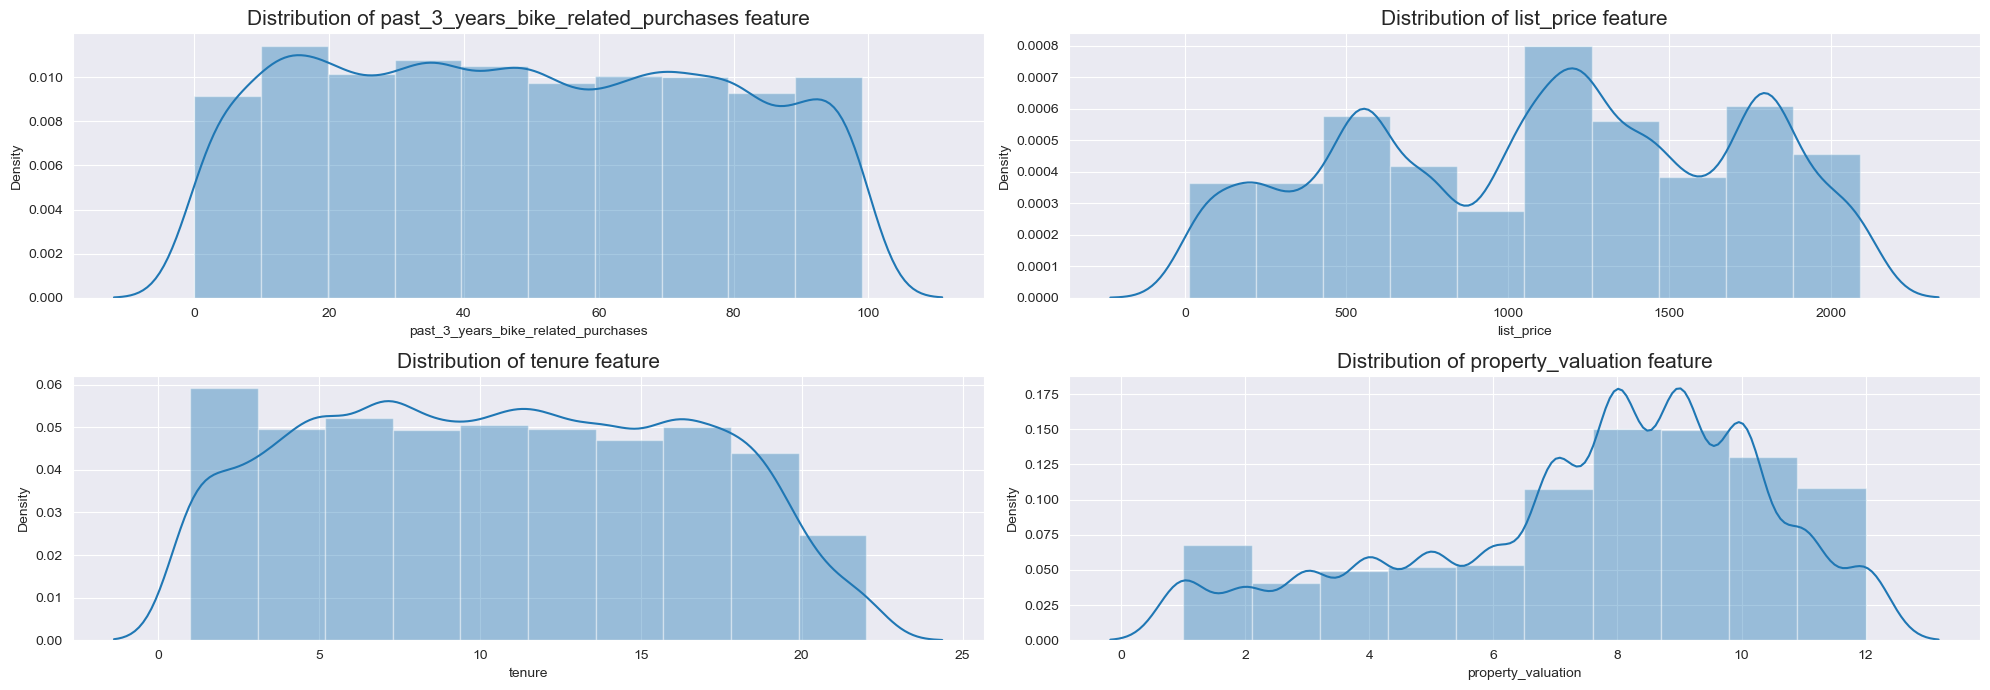

In [54]:
# Factors affecting company's expenditure
column = ['past_3_years_bike_related_purchases', 'list_price','tenure','property_valuation']
color=['red','blue']
plt.figure(figsize=(20,7))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.distplot(df[column[i]], bins=10)
    plt.xlabel(column[i])
    plt.title('Distribution of {} feature'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

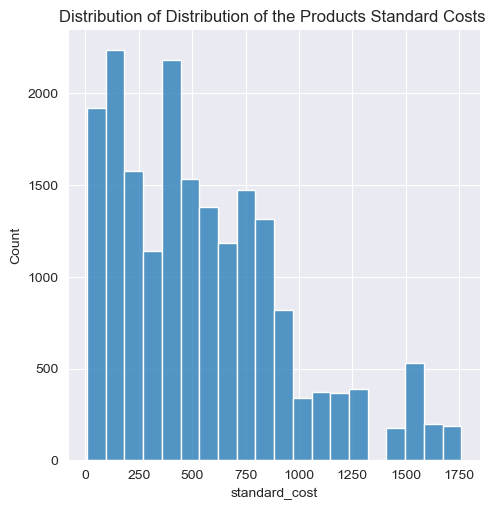

In [55]:
# Function for univariate distribution plots
def make_distplot(col, bins, title):
    sns.displot(col, bins=bins)
    plt.title('Distribution of {} '.format(title))
make_distplot(df['standard_cost'], 20, 'Distribution of the Products Standard Costs')

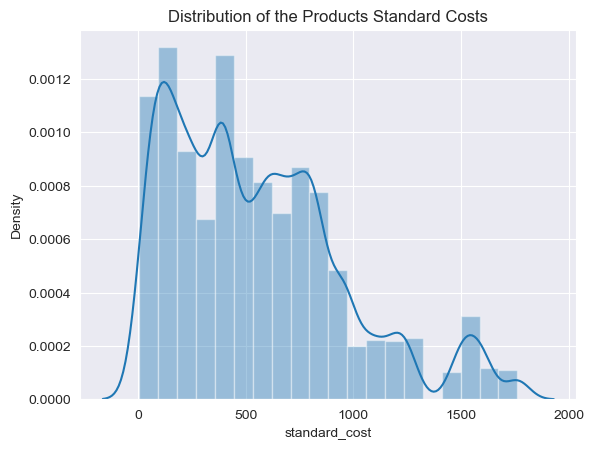

In [56]:
# Analysis of numerical columns
sns.distplot(df['standard_cost'], bins=20)
plt.title('Distribution of the Products Standard Costs');

Majority of the products (bikes and accessible cycling accessories) cost not more than 1000 AUD.

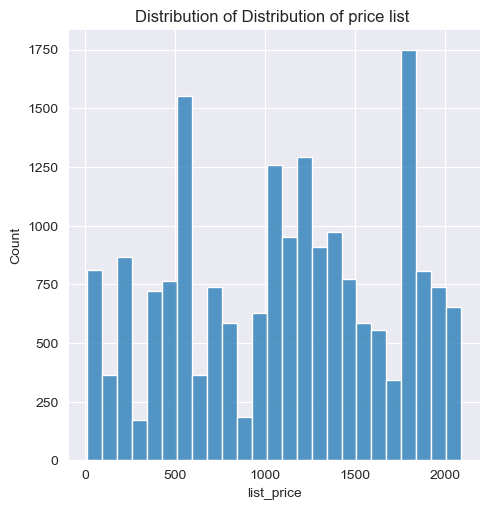

In [57]:
# list_price 
make_distplot(df['list_price'], 25, 'Distribution of price list')

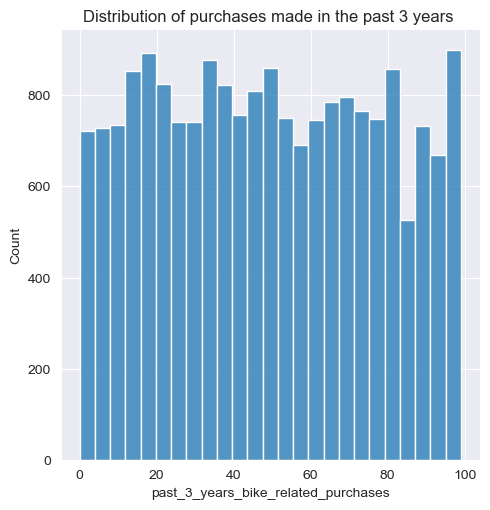

In [58]:
make_distplot(df['past_3_years_bike_related_purchases'], 25, 'purchases made in the past 3 years')

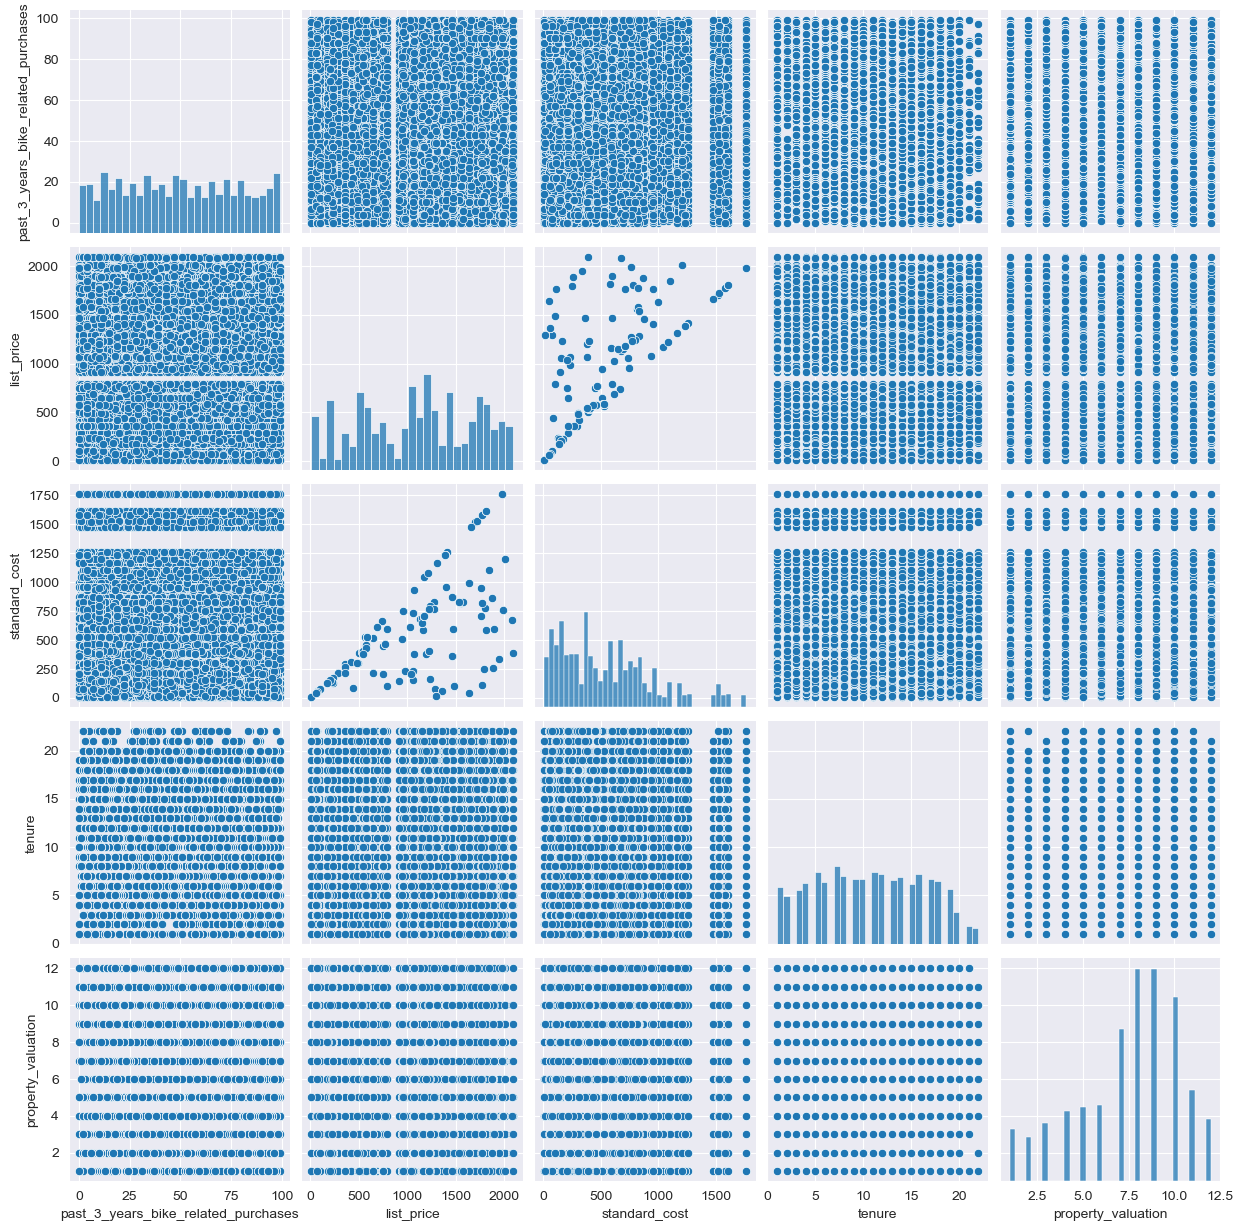

In [59]:
sns.pairplot(df[['past_3_years_bike_related_purchases', 'list_price','standard_cost','tenure','property_valuation']]);

In [60]:
df[['past_3_years_bike_related_purchases', 'list_price','standard_cost']].corr()

0                                    past_3_years_bike_related_purchases  \
0                                                                          
past_3_years_bike_related_purchases                             1.000000   
list_price                                                      0.007134   
standard_cost                                                  -0.009396   

0                                    list_price  standard_cost  
0                                                               
past_3_years_bike_related_purchases    0.007134      -0.009396  
list_price                             1.000000       0.552508  
standard_cost                          0.552508       1.000000

There is a moderately slight correlation between the list_price and standard_cost variables.

In [61]:
# Categorical columns
cat_col=df.select_dtypes(include=[object, bool]).columns
cat_col

Index(['customer_id', 'first_name', 'last_name', 'gender', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'transaction_id', 'online_order', 'brand', 'product_line',
       'product_class', 'product_size', 'address', 'postcode', 'state'],
      dtype='object', name=0)

## Analysis considering the gender factor

In [62]:
df['gender'].value_counts(normalize=True) * 100

Female    51.26507
Male      48.73493
Name: gender, dtype: float64

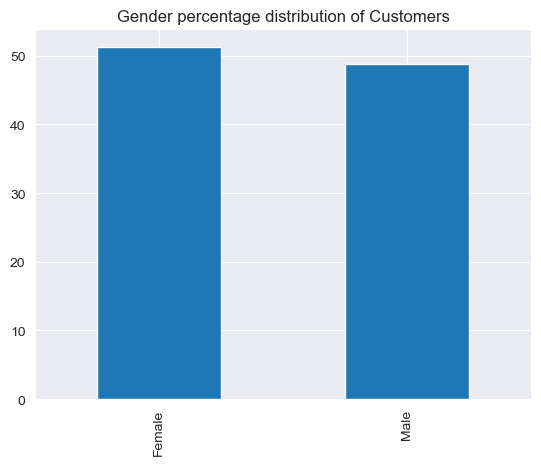

In [63]:
#Percentage of male and female customer
(df['gender'].value_counts(normalize=True) * 100).plot(
    kind='bar', title='Gender percentage distribution of Customers'
);

The Sprocket Central Pty Ltd has a partially equal amount of both male and female customers. The females are more than the males by about 3 %. 

### Do males or females purchase more expensive products?


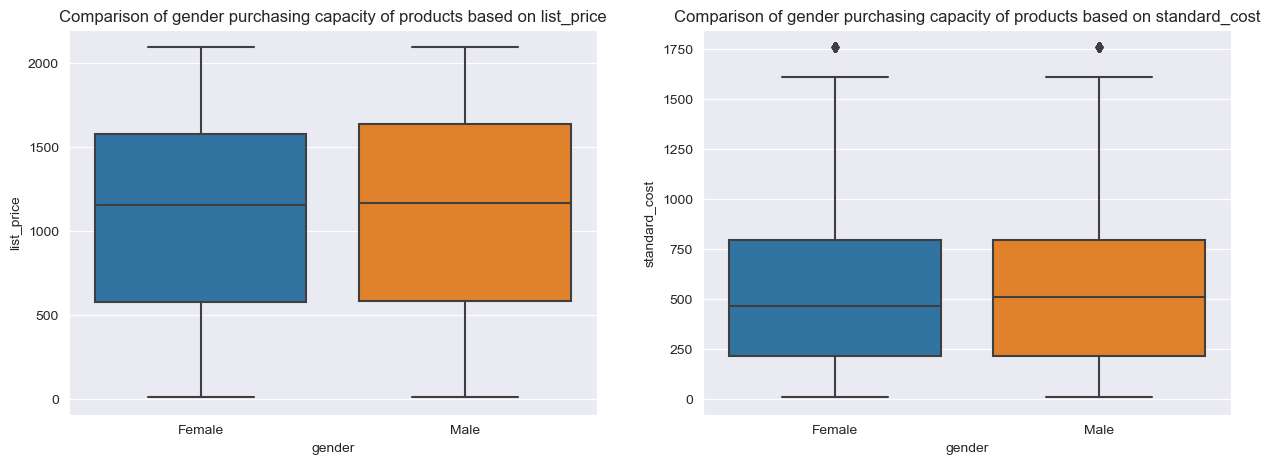

In [64]:
plt.figure(figsize=(15,5))
#Based on list_price
plt.subplot(1,2,1)
sns.boxplot(x=df['gender'], y=df['list_price'])
plt.title('Comparison of gender purchasing capacity of products based on list_price')
#Based on standard_cost
plt.subplot(1,2,2)
sns.boxplot(x=df['gender'], y=df['standard_cost'])
plt.title('Comparison of gender purchasing capacity of products based on standard_cost');

The males purchase more expensive products than the females even though the female customers are slightly more.

In [65]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'address', 'postcode', 'state', 'property_valuation'],
      dtype='object', name=0)

In [66]:
# Create a column for age and its ranges
now = pd.Timestamp('now')
df['DOB'] = pd.to_datetime(df['DOB'], format='%m%d%y')    # 1
df['DOB'] = df['DOB'].where(df['DOB'] < now, df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['DOB']).astype('<m8[Y]')    # 3
df['age'] = df['age'].astype('int')

In [67]:
df['age'].unique()

array([69, 42, 61, 45, 56, 47, 50, 68, 28, 40, 22, 46, 55, 44, 49, 54, 60,
       65, 59, 37, 67, 41, 51, 30, 29, 63, 34, 66, 26, 23, 53, 43, 57, 21,
       62, 38, 33, 36, 64, 48, 24, 32, 27, 25, 58, 35, 39, 52, 31, 79, 91,
       87, 82])

In [68]:
# Create Age group column
bins= [0,39,59,99]
labels = ['Young Adult','Middle Aged Adult','Old Adults']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print (df['AgeGroup'].value_counts())

Middle Aged Adult    9892
Young Adult          6043
Old Adults           3392
Name: AgeGroup, dtype: int64


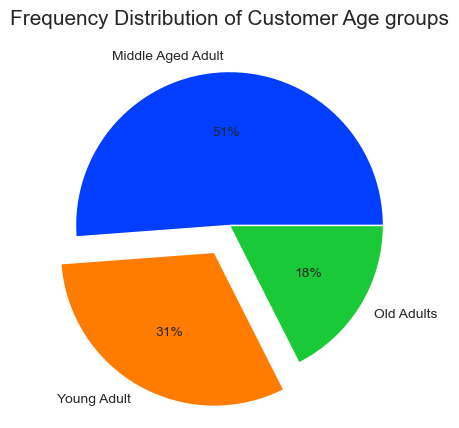

In [69]:
#Frequency distribution of Age groups using a pie chart
plt.figure(figsize=(8,5))
data = list(list((df['AgeGroup'].value_counts(normalize=True)*100)))
labels = list((df['AgeGroup'].value_counts(normalize=True)*100).index)
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:3]
explode = (0,0.2,0)
#create pie chart
plt.pie(data, labels = labels,explode=explode, colors = colors, autopct='%.0f%%')
plt.title('Frequency Distribution of Customer Age groups',size = 15)
plt.show()

Majority of the company's customers are middle aged adults with age range of 39-59. While the young adults also represent a significant percentage.

In [70]:
df_info()

data_type  null_count  \
0                                                                 
customer_id                                  object           0   
first_name                                   object           0   
last_name                                    object           0   
gender                                       object           0   
past_3_years_bike_related_purchases           int32           0   
DOB                                  datetime64[ns]           0   
job_title                                    object           0   
job_industry_category                        object           0   
wealth_segment                               object           0   
deceased_indicator                           object           0   
owns_car                                     object           0   
tenure                                       object           0   
transaction_id                               object           0   
product_id                                  float64           0   
transaction_date                     datetime64[ns]           0   
online_order                                 object           0   
order_status                                 object           0   
brand                                        object           0   
product_line                                 object           0   
product_class                                object           0   
product_size                                 object           0   
list_price                                  float64           0   
standard_cost                               float64           0   
address                                      object           0   
postcode                                     object           0   
state                                        object           0   
country                                      object           0   
property_valuation                           object           0   
len_postcode                                float64           0   

                                     null_percentage %  unique_count  
0                                                                     
customer_id                                        0.0          3413  
first_name                                         0.0          2778  
last_name                                          0.0          3195  
gender                                             0.0             3  
past_3_years_bike_related_purchases                0.0           100  
DOB                                                0.0          3047  
job_title                                          0.0           196  
job_industry_category                              0.0            10  
wealth_segment                                     0.0             3  
deceased_indicator                                 0.0             2  
owns_car                                           0.0             2  
tenure                                             0.0            22  
transaction_id                                     0.0         19335  
product_id                                         0.0           101  
transaction_date                                   0.0           364  
online_order                                       0.0             2  
order_status                                       0.0             1  
brand                                              0.0             6  
product_line                                       0.0             4  
product_class                                      0.0             3  
product_size                                       0.0             3  
list_price                                         0.0           100  
standard_cost                                      0.0           100  
address                                            0.0          3411  
postcode                                           0.0           829  
state                                          

In [71]:
df.head()

0 customer_id first_name  last_name  gender  \
0           1    Laraine  Medendorp  Female   
1           1    Laraine  Medendorp  Female   
2           1    Laraine  Medendorp  Female   
3           1    Laraine  Medendorp  Female   
4           1    Laraine  Medendorp  Female   

0  past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

0 job_industry_category wealth_segment deceased_indicator  ... product_class  \
0                Health  Mass Customer                  N  ...        medium   
1                Health  Mass Customer                  N  ...        medium   
2                Health  Mass Customer                  N  ...           low   
3                Health  Mass Customer                  N  ...        medium   
4                Health  Mass Customer                  N  ...        medium   

0  product_size list_price  standard_cost             address postcode  \
0        medium     235.63         125.07  060 Morning Avenue     2016   
1        medium    1577.53         826.51  060 Morning Avenue     2016   
2         small    1720.70        1531.42  060 Morning Avenue     2016   
3        medium     360.40         270.30  060 Morning Avenue     2016   
4        medium      71.49          53.62  060 Morning Avenue     2016   

0            state property_valuation age    AgeGroup  
0  New South Wales                 10  69  Old Adults  
1  New South Wales                 10  69  Old Adults  
2  New South Wales                 10  69  Old Adults  
3  New South Wales                 10  69  Old Adults  
4  New South Wales                 10  69  Old Adults  

[5 rows x 28 columns]

### Is there relationship between the wealth class of customers and the amount spent on products ?

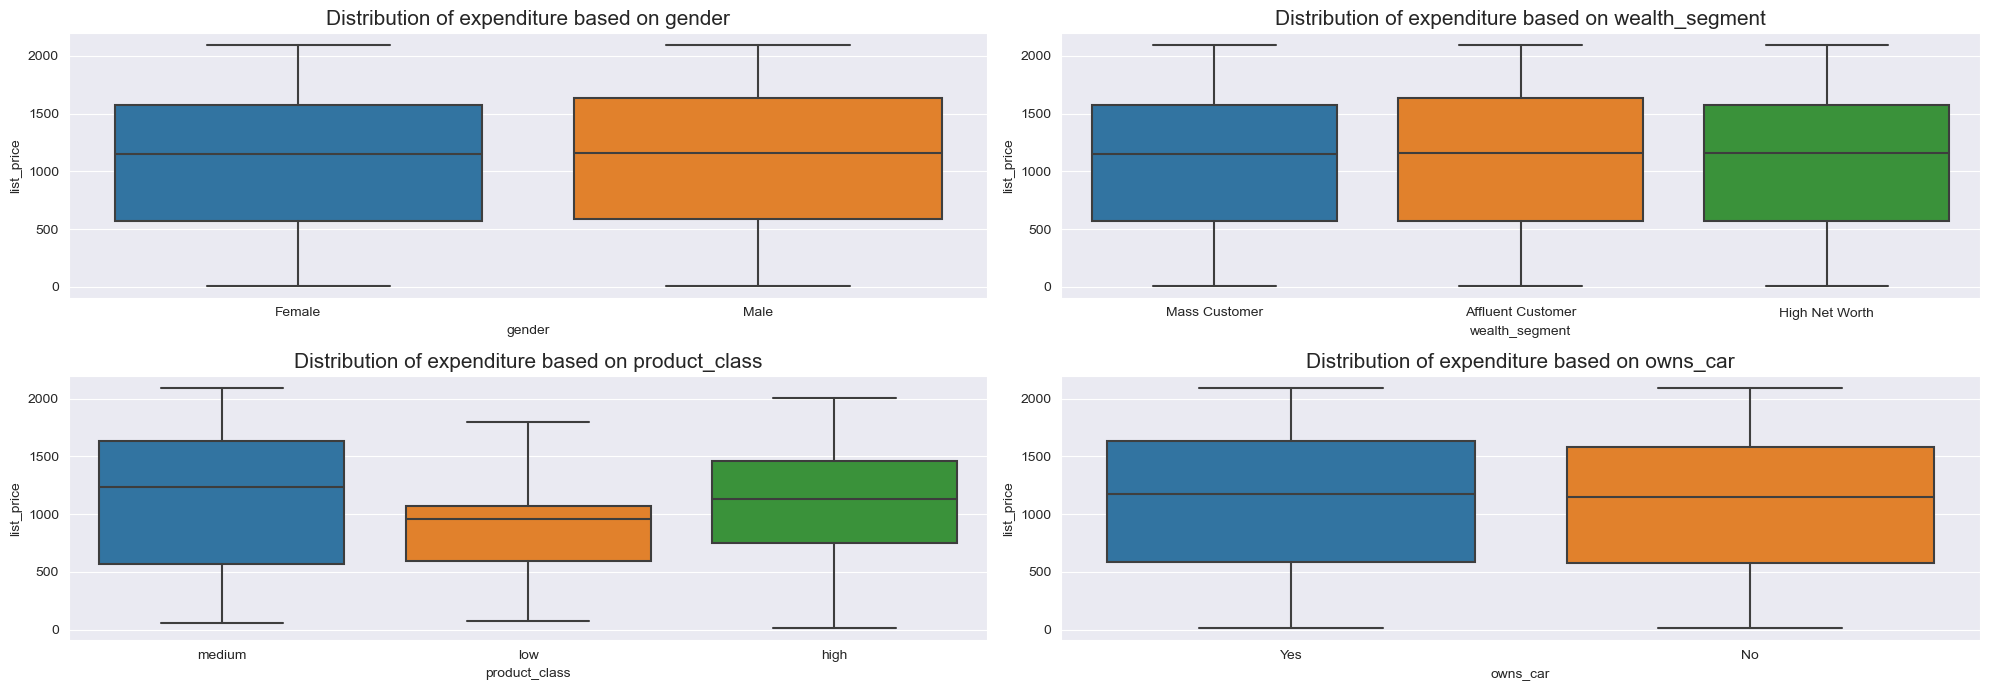

In [72]:
# Factors affecting company's expenditure
column = ['gender','wealth_segment','product_class','owns_car']
color=['red','blue']
plt.figure(figsize=(20,7))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[column[i]],y=df['list_price'])
    plt.xlabel(column[i])
    plt.title('Distribution of expenditure based on {}'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

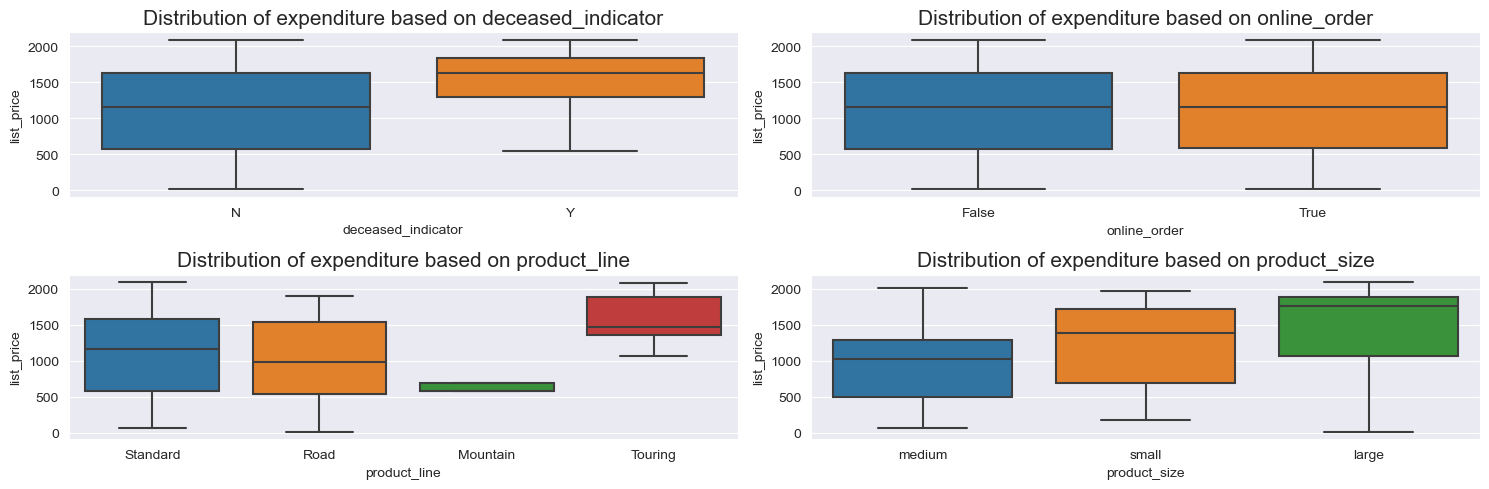

In [73]:
# Factors affecting company's expenditure
column = ['deceased_indicator','online_order','product_line','product_size']
plt.figure(figsize=(15,5))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[column[i]],y=df['list_price'])
    plt.xlabel(column[i])
    plt.title('Distribution of expenditure based on {}'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

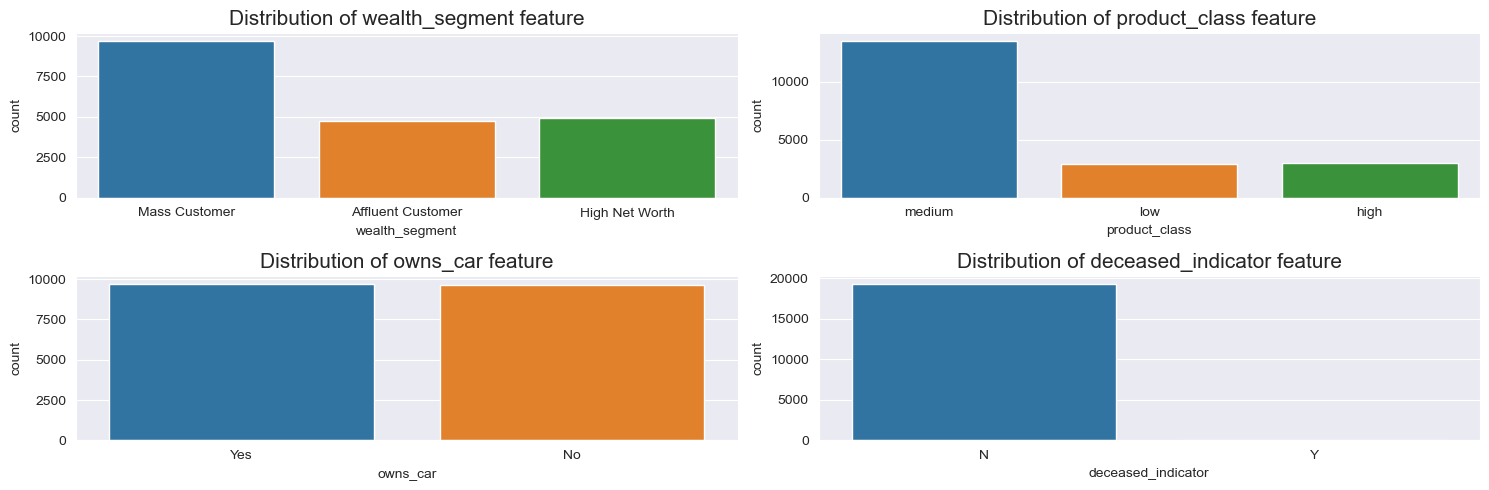

In [74]:
# Countplot distribution of categorical columns
column = ['wealth_segment','product_class','owns_car','deceased_indicator']
plt.figure(figsize=(15,5))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[column[i]])
    plt.xlabel(column[i])
    plt.title('Distribution of {} feature'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

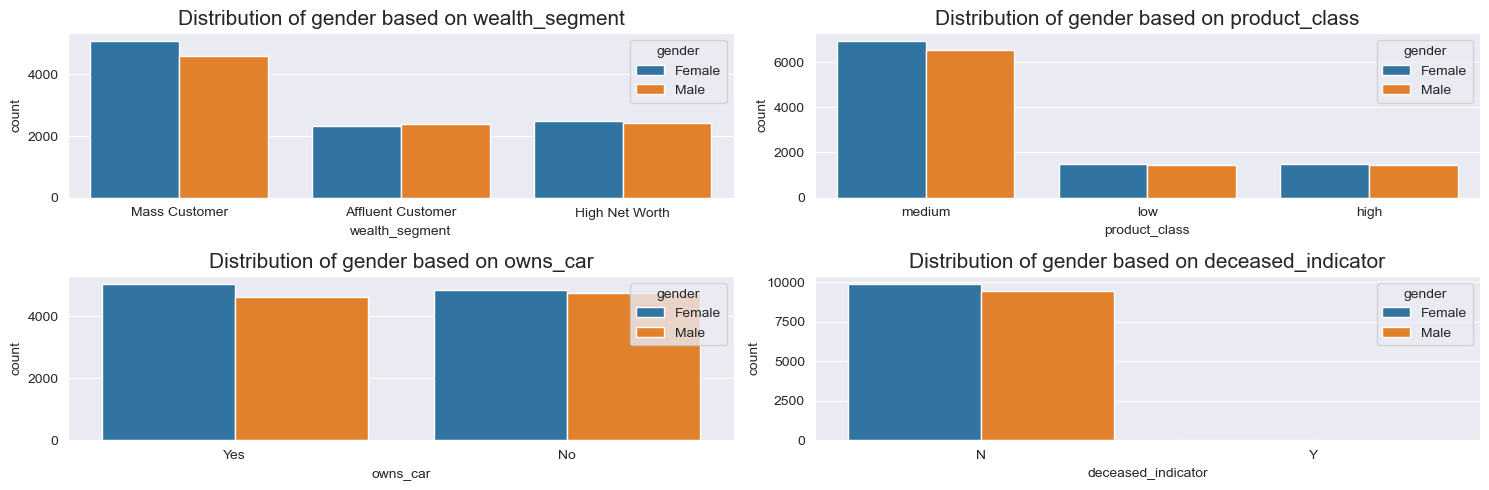

In [75]:
# Indepth analysis of the kind of males and females
column = ['wealth_segment','product_class','owns_car','deceased_indicator']
plt.figure(figsize=(15,5))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[column[i]], hue=df['gender'])
    plt.xlabel(column[i])
    plt.title('Distribution of gender based on {}'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

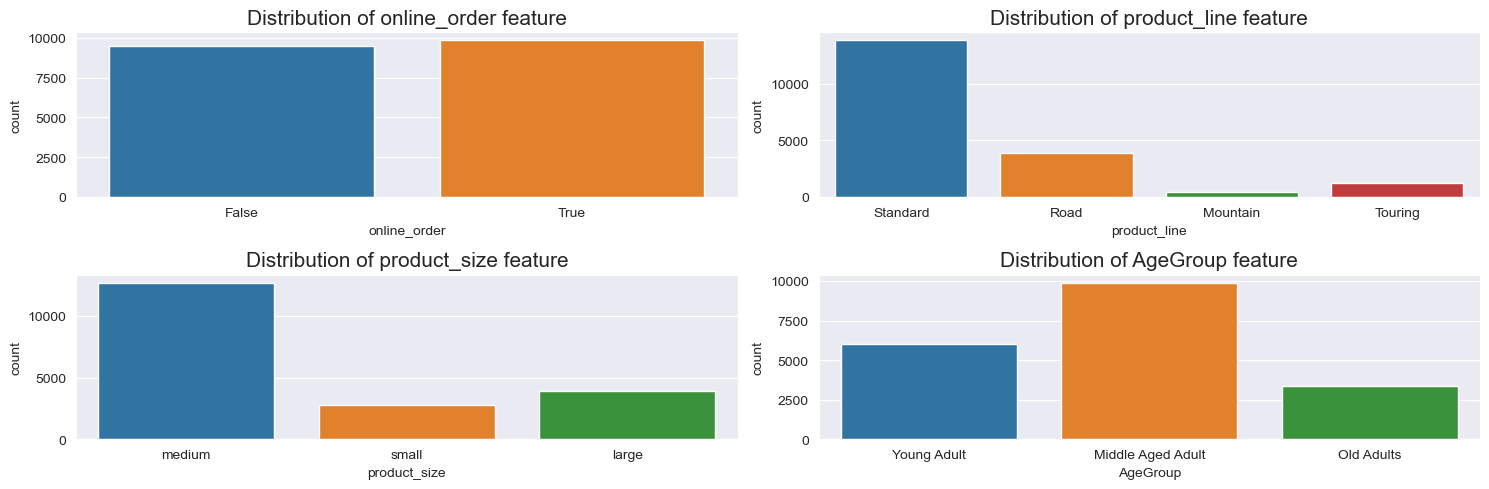

In [76]:
# Countplot distribution of categorical columns
column = ['online_order','product_line','product_size','AgeGroup']
plt.figure(figsize=(15,5))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[column[i]])
    plt.xlabel(column[i])
    plt.title('Distribution of {} feature'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

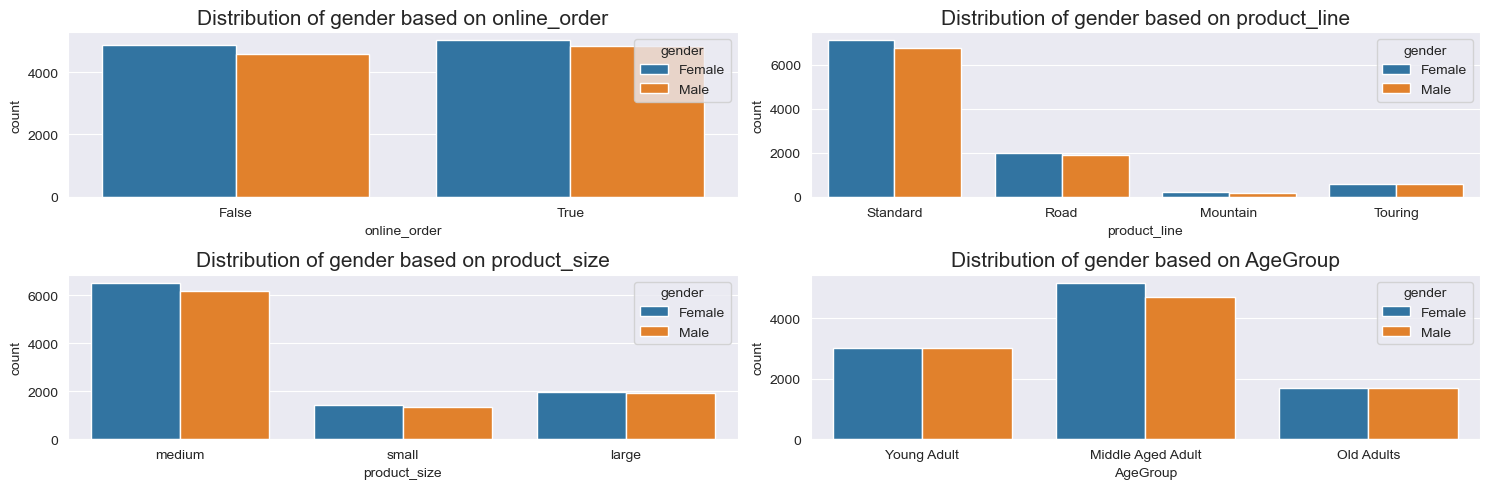

In [77]:
# Indepth analysis of the kind of males and females
column = ['online_order','product_line','product_size','AgeGroup']
plt.figure(figsize=(15,5))
for i in range(len(column)):
    plt.subplot(2,2,i+1)
    sns.countplot(df[column[i]], hue=df['gender'])
    plt.xlabel(column[i])
    plt.title('Distribution of gender based on {}'.format(column[i]),size=15)
plt.tight_layout()
plt.show()

In [78]:
df['deceased_indicator'].value_counts(normalize=True)*100

N    99.958607
Y     0.041393
Name: deceased_indicator, dtype: float64

A very minute fraction of customers have been deceased, approximately 0.04%.

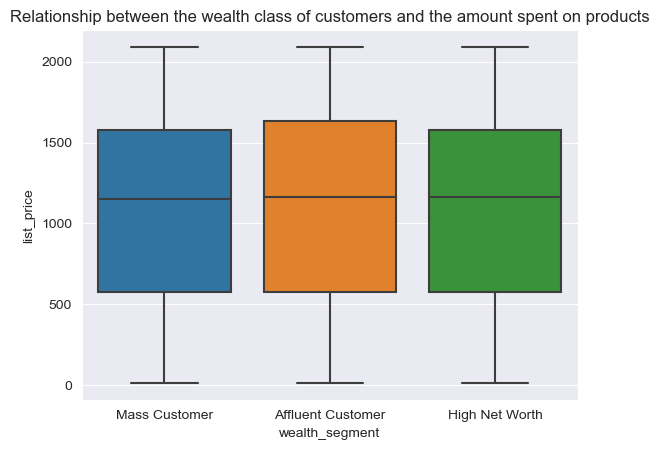

In [79]:
#Relationship between wealth segment and standard cost
sns.boxplot(x=df['wealth_segment'],y=df['list_price'])
plt.title('Relationship between the wealth class of customers and the amount spent on products');

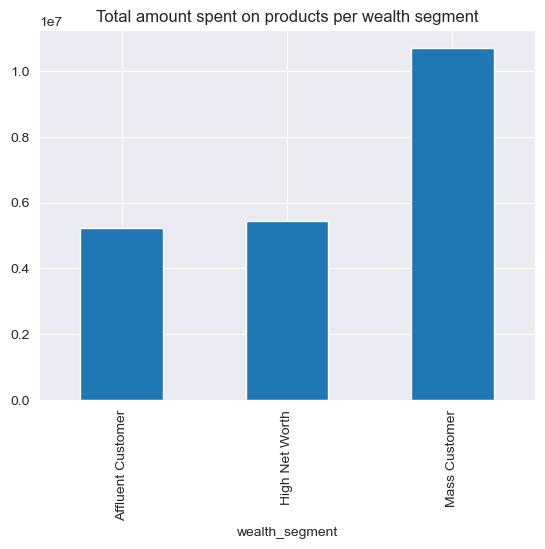

In [80]:
(df.groupby('wealth_segment')['list_price'].sum()).plot(
    kind='bar', title='Total amount spent on products per wealth segment'
);

In [81]:
df['wealth_segment'].value_counts(normalize=True)*100

Mass Customer        50.095721
High Net Worth       25.482486
Affluent Customer    24.421793
Name: wealth_segment, dtype: float64

A large amount of the company's expenditure is from the Mass customer group. Although this can attributed to the fact that this group covers 50% of the company's customers.But on the average the high net worth and affluent customer group contribute equally despite its lower percentage customer coverage. These groups should be considered has the high net-worth customer group.

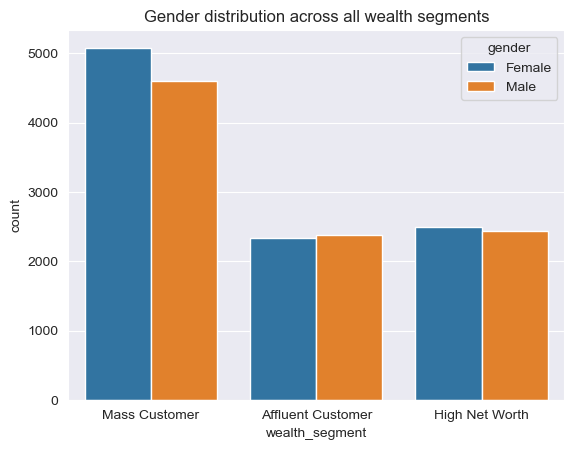

In [82]:
sns.countplot(df['wealth_segment'], hue=df['gender'])
plt.title('Gender distribution across all wealth segments');

There is relatively equal gender distribution across all wealth segments with more females having high net worth than males.

# Online orders

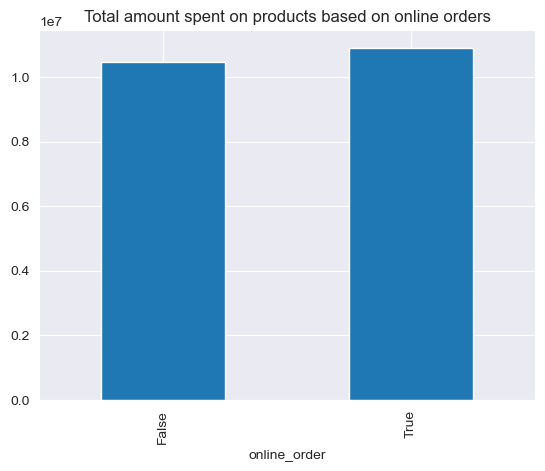

In [83]:
(df.groupby('online_order')['list_price'].sum()).plot(
    kind='bar', title='Total amount spent on products based on online orders'
);

In [84]:
df['online_order'].value_counts(normalize=True)*100

True     50.970145
False    49.029855
Name: online_order, dtype: float64

There is a relatively equal amount of customers that make online orders and physically buy products. Equal attention should be guven to both categories.

# Cohort Analysis

In [85]:
df.head()

0 customer_id first_name  last_name  gender  \
0           1    Laraine  Medendorp  Female   
1           1    Laraine  Medendorp  Female   
2           1    Laraine  Medendorp  Female   
3           1    Laraine  Medendorp  Female   
4           1    Laraine  Medendorp  Female   

0  past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

0 job_industry_category wealth_segment deceased_indicator  ... product_class  \
0                Health  Mass Customer                  N  ...        medium   
1                Health  Mass Customer                  N  ...        medium   
2                Health  Mass Customer                  N  ...           low   
3                Health  Mass Customer                  N  ...        medium   
4                Health  Mass Customer                  N  ...        medium   

0  product_size list_price  standard_cost             address postcode  \
0        medium     235.63         125.07  060 Morning Avenue     2016   
1        medium    1577.53         826.51  060 Morning Avenue     2016   
2         small    1720.70        1531.42  060 Morning Avenue     2016   
3        medium     360.40         270.30  060 Morning Avenue     2016   
4        medium      71.49          53.62  060 Morning Avenue     2016   

0            state property_valuation age    AgeGroup  
0  New South Wales                 10  69  Old Adults  
1  New South Wales                 10  69  Old Adults  
2  New South Wales                 10  69  Old Adults  
3  New South Wales                 10  69  Old Adults  
4  New South Wales                 10  69  Old Adults  

[5 rows x 28 columns]

In [86]:
df_info()

data_type  null_count  \
0                                                                 
customer_id                                  object           0   
first_name                                   object           0   
last_name                                    object           0   
gender                                       object           0   
past_3_years_bike_related_purchases           int32           0   
DOB                                  datetime64[ns]           0   
job_title                                    object           0   
job_industry_category                        object           0   
wealth_segment                               object           0   
deceased_indicator                           object           0   
owns_car                                     object           0   
tenure                                       object           0   
transaction_id                               object           0   
product_id                                  float64           0   
transaction_date                     datetime64[ns]           0   
online_order                                 object           0   
order_status                                 object           0   
brand                                        object           0   
product_line                                 object           0   
product_class                                object           0   
product_size                                 object           0   
list_price                                  float64           0   
standard_cost                               float64           0   
address                                      object           0   
postcode                                     object           0   
state                                        object           0   
country                                      object           0   
property_valuation                           object           0   
len_postcode                                float64           0   

                                     null_percentage %  unique_count  
0                                                                     
customer_id                                        0.0          3413  
first_name                                         0.0          2778  
last_name                                          0.0          3195  
gender                                             0.0             3  
past_3_years_bike_related_purchases                0.0           100  
DOB                                                0.0          3047  
job_title                                          0.0           196  
job_industry_category                              0.0            10  
wealth_segment                                     0.0             3  
deceased_indicator                                 0.0             2  
owns_car                                           0.0             2  
tenure                                             0.0            22  
transaction_id                                     0.0         19335  
product_id                                         0.0           101  
transaction_date                                   0.0           364  
online_order                                       0.0             2  
order_status                                       0.0             1  
brand                                              0.0             6  
product_line                                       0.0             4  
product_class                                      0.0             3  
product_size                                       0.0             3  
list_price                                         0.0           100  
standard_cost                                      0.0           100  
address                                            0.0          3411  
postcode                                           0.0           829  
state                                          

In [87]:
# Keep relevant columns and drop duplicates
df_ = df[['customer_id','transaction_id', 'transaction_date']].drop_duplicates()

In [88]:
df_['transaction_month'] = df_['transaction_date'].dt.to_period('M')
df_['cohort'] = df_.groupby('customer_id')['transaction_date'].transform('min').dt.to_period('M') 

In [89]:
df_cohort = df_.groupby(['cohort', 'transaction_month']).agg(n_customers=('customer_id', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.transaction_month - df_cohort.cohort).apply(attrgetter('n'))

In [90]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [91]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

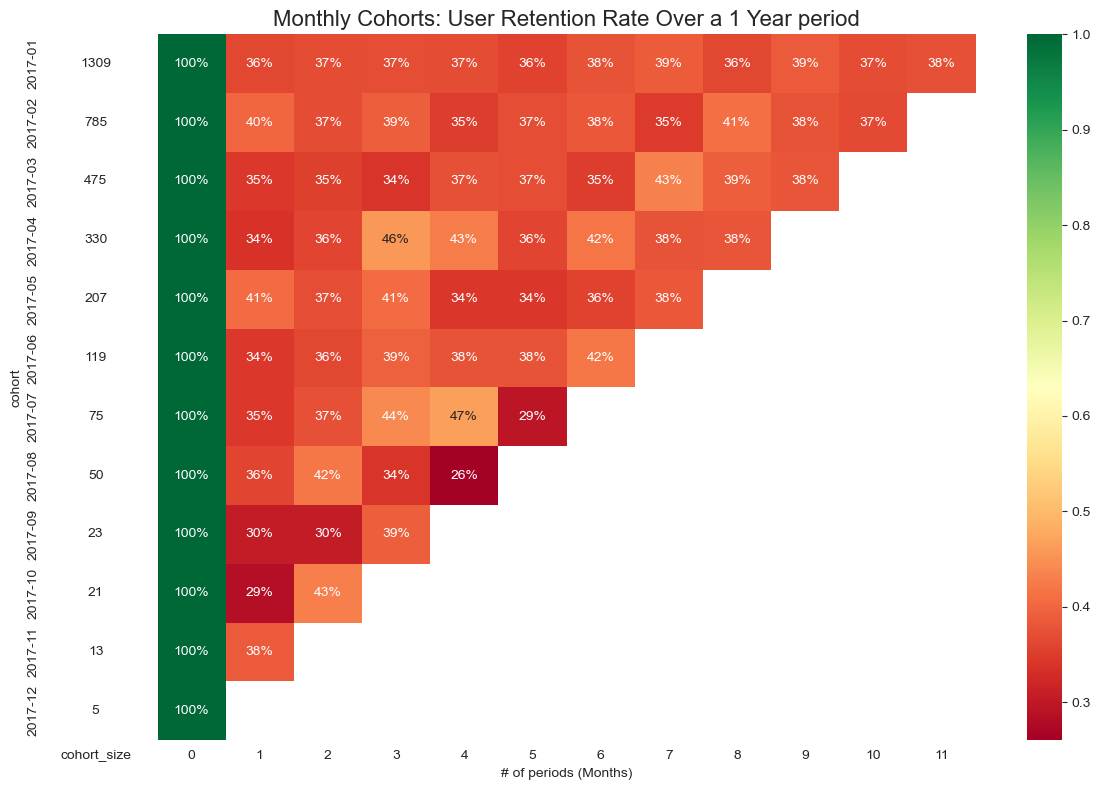

In [92]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention Rate Over a 1 Year period', fontsize=16)
    ax[1].set(xlabel='# of periods (Months)',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


- A high traffic of customer base was generated in the first 3 months (January, February, March) but a sequential decrease till the end of the year.
- January has the highest cohort customer base as this is the time when manufacturers roll out new models of bikes therefore grabbing the attention of customers.
- After the first month, 30-40% of the customers are retained for some months up until October where a significant increase in customer base is observed. A gradual decrease is observed after october till a December where it stabilizes again.
- On the average, the company maintains about 30-37% of its customer cohorts after there initial purchase.
- 


# Insights obtained from the Cohort Analysis

In [93]:
cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
retention_matrix

period_number   0         1         2         3         4         5   \
cohort                                                                 
2017-01        1.0  0.362872  0.368984  0.371276  0.367456  0.356761   
2017-02        1.0  0.400000  0.368153  0.391083  0.350318  0.370701   
2017-03        1.0  0.345263  0.353684  0.338947  0.374737  0.370526   
2017-04        1.0  0.336364  0.360606  0.457576  0.427273  0.360606   
2017-05        1.0  0.405797  0.371981  0.405797  0.342995  0.342995   
2017-06        1.0  0.344538  0.361345  0.394958  0.378151  0.378151   
2017-07        1.0  0.346667  0.373333  0.440000  0.466667  0.293333   
2017-08        1.0  0.360000  0.420000  0.340000  0.260000       NaN   
2017-09        1.0  0.304348  0.304348  0.391304       NaN       NaN   
2017-10        1.0  0.285714  0.428571       NaN       NaN       NaN   
2017-11        1.0  0.384615       NaN       NaN       NaN       NaN   
2017-12        1.0       NaN       NaN       NaN       NaN       NaN   

period_number        6         7         8         9         10        11  
cohort                                                                     
2017-01        0.376623  0.388083  0.363636  0.386555  0.368220  0.375095  
2017-02        0.382166  0.347771  0.412739  0.377070  0.365605       NaN  
2017-03        0.351579  0.431579  0.391579  0.378947       NaN       NaN  
2017-04        0.418182  0.375758  0.378788       NaN       NaN       NaN  
2017-05        0.357488  0.381643       NaN       NaN       NaN       NaN  
2017-06        0.420168       NaN       NaN       NaN       NaN       NaN  
2017-07             NaN       NaN       NaN       NaN       NaN       NaN  
2017-08             NaN       NaN       NaN       NaN       NaN       NaN  
2017-09             NaN       NaN       NaN       NaN       NaN       NaN  
2017-10             NaN       NaN       NaN       NaN       NaN       NaN  
2017-11             NaN       NaN       NaN       NaN       NaN       NaN  
2017-12             NaN       NaN       NaN       NaN       NaN       NaN

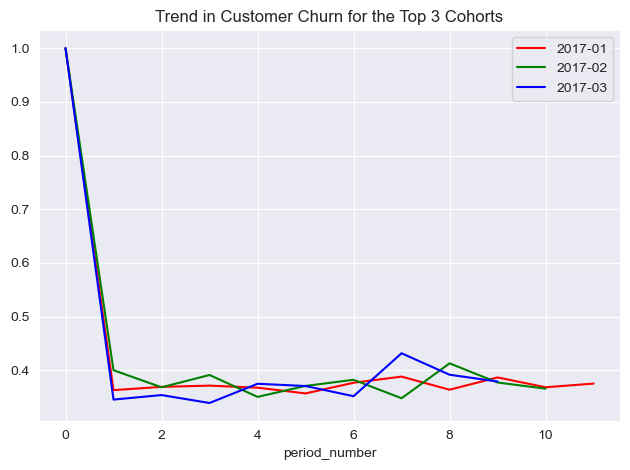

In [94]:
# Lets look at the trend of customer churn for the top 5 cohorts
retention_matrix_top=retention_matrix.iloc[:10,:]
for i in range(3):
    color=['r','g','b']
    churn=retention_matrix_top.iloc[i,:]
    sns.lineplot(x=churn.index, y=churn.values, label=churn.name, color=color[i])
plt.title('Trend in Customer Churn for the Top 3 Cohorts')
plt.tight_layout()
plt.legend();

In [95]:
# The features used to train and develop the model must correspond to the features in the test data
features=list(set(NewCustomer_df.columns) & set(df.columns))
features

['past_3_years_bike_related_purchases',
 'gender',
 'owns_car',
 'job_industry_category',
 'address',
 'postcode',
 'DOB',
 'tenure',
 'deceased_indicator',
 'wealth_segment',
 'property_valuation',
 'job_title',
 'first_name',
 'state',
 'last_name']

# RFM Analysis

In [96]:
# Initialize a copy of the dataframe
df_rfm=df.copy()
#Select only useful columns
useful=['customer_id', 'transaction_id', 'product_id',
       'transaction_date','list_price']
df_rfm=df_rfm[useful]
df_rfm.head()

0 customer_id transaction_id  product_id transaction_date  list_price
0           1             94        86.0       2017-12-23      235.63
1           1           3765        38.0       2017-04-06     1577.53
2           1           5157        47.0       2017-05-11     1720.70
3           1           9785        72.0       2017-01-05      360.40
4           1          13424         2.0       2017-02-21       71.49

### Recency

In [97]:
# Extraxt recency
df_recency=pd.DataFrame(df_rfm.groupby('customer_id')['transaction_date'].max().reset_index())
# Convert to datetime and extract the date only
df_recency['transaction_date']=pd.to_datetime(df_recency['transaction_date']).dt.date
df_recency['Max_transaction_date']=df_recency['transaction_date'].max()
df_recency['Recency']=(df_recency['Max_transaction_date'] - df_recency['transaction_date']).dt.days + 1
df_recency=df_recency[['customer_id','Recency']]
df_recency.head()

customer_id  Recency
0            1        8
1            2      129
2            4      196
3            5       17
4            6       65

### Frequency

In [98]:
# Extract frequency
df_frequency=df_rfm.groupby('customer_id')['transaction_id'].nunique().reset_index()
df_frequency.columns=['fcustomer_id','Frequency']
df_frequency.head()

fcustomer_id  Frequency
0             1         11
1             2          3
2             4          2
3             5          6
4             6          5

### Monetary

In [99]:
# Extract monetary value
df_monetary=df_rfm.groupby('customer_id')['list_price'].sum().reset_index()
df_monetary.columns=['mcustomer_id','Monetary']
df_monetary.head()

mcustomer_id  Monetary
0             1   9084.45
1             2   4149.07
2             4   1047.72
3             5   5903.20
4             6   5931.69

In [100]:
# Combine recency, frequency and monetary into a single df
RFM=pd.concat([df_recency,df_frequency,df_monetary],axis=1)
RFM.drop(columns=['fcustomer_id','mcustomer_id'], inplace=True)
RFM.head()

customer_id  Recency  Frequency  Monetary
0            1        8         11   9084.45
1            2      129          3   4149.07
2            4      196          2   1047.72
3            5       17          6   5903.20
4            6       65          5   5931.69

In [101]:
# Preview of extracted RFM values
RFM['customer_id']=RFM['customer_id'].astype('str')
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  3412 non-null   object 
 1   Recency      3412 non-null   int64  
 2   Frequency    3412 non-null   int64  
 3   Monetary     3412 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 106.8+ KB


In [102]:
print('There are {} distinct customers.'.format(RFM.shape[0]))

There are 3412 distinct customers.


In [103]:
# Stastical summary of RFM values with careful study of the percentiles
RFM.describe(percentiles=[0.25,0.50,0.75,0.95])

Recency   Frequency      Monetary
count  3412.000000  3412.00000   3412.000000
mean     62.635111     5.66442   6267.383883
std      58.548190     2.31148   2945.699196
min       1.000000     1.00000     60.340000
25%      19.000000     4.00000   4149.430000
50%      45.000000     6.00000   5979.365000
75%      87.000000     7.00000   8094.372500
95%     183.000000    10.00000  11622.913000
max     354.000000    14.00000  19071.320000

# RFM Analysis Approach

- As we got RFM for each customer, the goal now is to categorize the customers into different categories based upon their values.
- For this we will first of all categorize the R,F,M values into the labels 1-5. 1 being the low and 5 being the higest. Here we make cuts at 25%, 50%, 75% and 95%to distribute them into 5 categories.
- After that we sum these values for each row and label the column 'score' which have values range from 3-15.
- After that we make cuts on 'score' at 7 to categorize the customers into Good and bad customers.
- These cuts can be done in many ways like by discussion with the client, according to expert advise, business understanding or quartiles cuts(which we did in this) etc.

In [104]:
# Categorize the customers into different categories based upon their values.
RFM['Recency_score']=pd.cut(RFM['Recency'], bins=[0,19,45,87,183,374], labels=[5,4,3,2,1])
RFM['Frequency_score']=pd.cut(RFM['Frequency'], bins=[0,4,6,7,10,14], labels=[1,2,3,4,5])
RFM['Monetary_score']=pd.cut(RFM['Monetary'], bins=[-1,4150,6000,8000,11000,20000], labels=[1,2,3,4,5])
# Conert Dtype to integers
# Categorize the customers into different categories based upon their values.
RFM['Recency_score']=RFM['Recency_score'].astype('int32')
RFM['Frequency_score']=RFM['Frequency_score'].astype('int32')
RFM['Monetary_score']=RFM['Monetary_score'].astype('int32')
# Create a column of accumulated scores
RFM['Score']=RFM['Recency_score']+RFM['Frequency_score']+RFM['Monetary_score']
RFM.head()

customer_id  Recency  Frequency  Monetary  Recency_score  Frequency_score  \
0           1        8         11   9084.45              5                5   
1           2      129          3   4149.07              2                1   
2           4      196          2   1047.72              1                1   
3           5       17          6   5903.20              5                2   
4           6       65          5   5931.69              3                2   

   Monetary_score  Score  
0               4     14  
1               1      4  
2               1      3  
3               2      9  
4               2      7

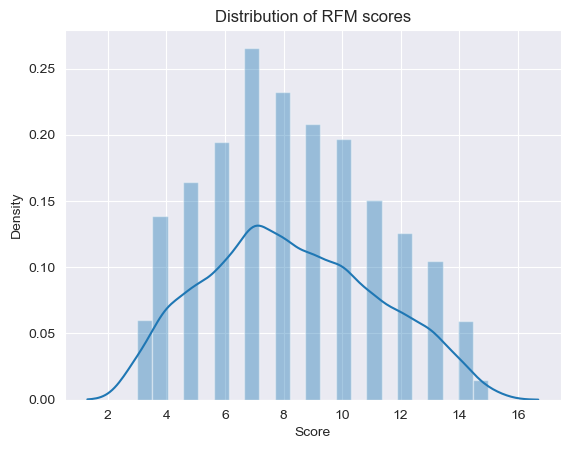

In [105]:
# Check for distribution of customer types
sns.distplot(RFM['Score'])
plt.title('Distribution of RFM scores');

In [106]:
# Statistical Preview of the 'Score' column to check for the spread of score values
RFM['Score'].describe(percentiles=[0.25,0.50,0.75,0.95])

count    3412.000000
mean        8.281653
std         2.885194
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
95%        13.000000
max        15.000000
Name: Score, dtype: float64

In [107]:
# We will assign customers into 2 categories based on the cummulative RFM scores obtained
RFM['Customer_segment']=pd.cut(RFM['Score'], bins=[0,8,15], labels=['Bad','Good'])
RFM['Cluster_RFM']=RFM['Customer_segment'].replace({'Bad':0,'Good':1})
RFM.head()

customer_id  Recency  Frequency  Monetary  Recency_score  Frequency_score  \
0           1        8         11   9084.45              5                5   
1           2      129          3   4149.07              2                1   
2           4      196          2   1047.72              1                1   
3           5       17          6   5903.20              5                2   
4           6       65          5   5931.69              3                2   

   Monetary_score  Score Customer_segment Cluster_RFM  
0               4     14             Good           1  
1               1      4              Bad           0  
2               1      3              Bad           0  
3               2      9             Good           1  
4               2      7              Bad           0

In [108]:
RFM['Customer_segment'].value_counts(normalize=True)

Bad     0.550703
Good    0.449297
Name: Customer_segment, dtype: float64

About 45% of the customers a considered to be good customers. More focus can be chanelled to this set of customers.

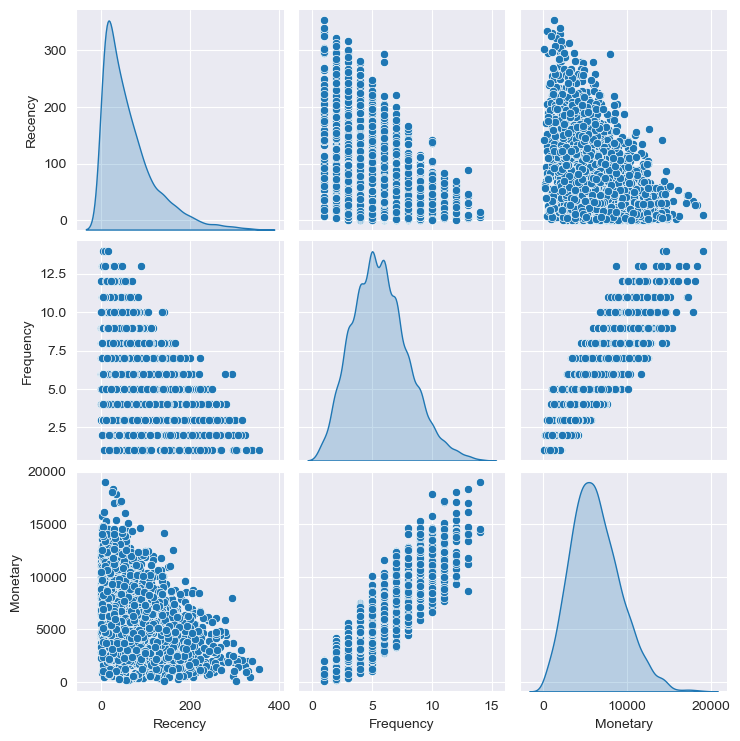

In [109]:
# Recency vs Frequency vs Monetary
sns.pairplot(RFM[['Recency','Frequency','Monetary']],diag_kind='kde');

In [110]:
#Interactive 3D-visualization of customer segments
RFM['Customer_segment']=RFM['Customer_segment'].astype('category')
fig = px.scatter_3d(RFM,
                    x=RFM['Recency'],
                    y=RFM['Frequency'],
                    z=RFM['Monetary'],
                    title='Visualization of Current Customer Segments Based on RFM',
              color='Customer_segment')
fig.update_layout(showlegend=True)
fig.show()

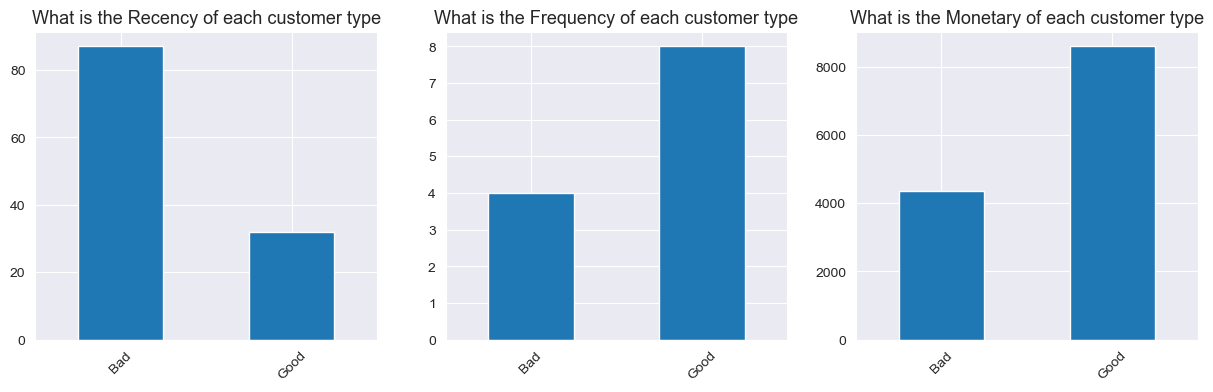

In [111]:
column = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,4))
for i,j in enumerate(column):
    plt.subplot(1,3,i+1)
    RFM.groupby('Customer_segment')[j].mean().round(0).plot(kind='bar')
    plt.title('What is the {} of each customer type'.format(j), size=13)
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.show()

The RFM analysis reveals that the Good customers have a high frequency, high monetary value and low recency when compared to the Bad customers.

In [112]:
RFM['customer_id']=RFM['customer_id'].astype('int')
df['customer_id']=df['customer_id'].astype('int')
df_train=pd.merge(df,RFM[['customer_id','Customer_segment','Cluster_RFM']], on='customer_id', how='left')
df_train.head()

customer_id first_name  last_name  gender  \
0            1    Laraine  Medendorp  Female   
1            1    Laraine  Medendorp  Female   
2            1    Laraine  Medendorp  Female   
3            1    Laraine  Medendorp  Female   
4            1    Laraine  Medendorp  Female   

   past_3_years_bike_related_purchases        DOB            job_title  \
0                                   93 1953-10-12  Executive Secretary   
1                                   93 1953-10-12  Executive Secretary   
2                                   93 1953-10-12  Executive Secretary   
3                                   93 1953-10-12  Executive Secretary   
4                                   93 1953-10-12  Executive Secretary   

  job_industry_category wealth_segment deceased_indicator  ... list_price  \
0                Health  Mass Customer                  N  ...     235.63   
1                Health  Mass Customer                  N  ...    1577.53   
2                Health  Mass Customer                  N  ...    1720.70   
3                Health  Mass Customer                  N  ...     360.40   
4                Health  Mass Customer                  N  ...      71.49   

   standard_cost             address  postcode            state  \
0         125.07  060 Morning Avenue      2016  New South Wales   
1         826.51  060 Morning Avenue      2016  New South Wales   
2        1531.42  060 Morning Avenue      2016  New South Wales   
3         270.30  060 Morning Avenue      2016  New South Wales   
4          53.62  060 Morning Avenue      2016  New South Wales   

  property_valuation age    AgeGroup Customer_segment Cluster_RFM  
0                 10  69  Old Adults             Good           1  
1                 10  69  Old Adults             Good           1  
2                 10  69  Old Adults             Good           1  
3                 10  69  Old Adults             Good           1  
4                 10  69  Old Adults             Good           1  

[5 rows x 30 columns]

In [113]:
df_train.shape

(19327, 30)

In [114]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19327 entries, 0 to 19326
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19327 non-null  int32         
 1   first_name                           19327 non-null  object        
 2   last_name                            19327 non-null  object        
 3   gender                               19327 non-null  object        
 4   past_3_years_bike_related_purchases  19327 non-null  int32         
 5   DOB                                  19327 non-null  datetime64[ns]
 6   job_title                            19327 non-null  object        
 7   job_industry_category                19327 non-null  object        
 8   wealth_segment                       19327 non-null  object        
 9   deceased_indicator                   19327 non-null  object        
 10  owns_car  

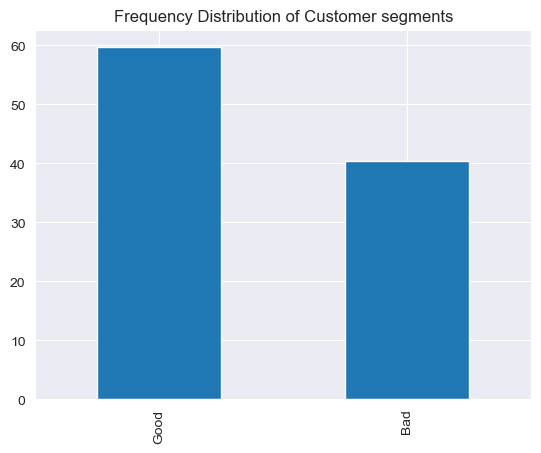

In [115]:
# Frequency of customer_segment
(df_train['Customer_segment'].value_counts(normalize=True)*100).plot(
    kind='bar',title='Frequency Distribution of Customer segments'
);

# Feature selection

In [116]:
# Useful features will be selected from the features that are common to both the labelled dataset and the new dataset
list(set(NewCustomer_df.columns) & set(df_train.columns))

['past_3_years_bike_related_purchases',
 'gender',
 'owns_car',
 'job_industry_category',
 'address',
 'postcode',
 'DOB',
 'tenure',
 'deceased_indicator',
 'wealth_segment',
 'property_valuation',
 'job_title',
 'first_name',
 'state',
 'last_name']

In [117]:
features=['customer_id','job_industry_category',
 'job_title',
 'property_valuation',
 'deceased_indicator',
 'owns_car',
 'past_3_years_bike_related_purchases',
 'wealth_segment',
 'tenure',
 'state',
 'gender',
 'DOB',
 'postcode','AgeGroup','Customer_segment']

In [118]:
df_train=df_train[features]
df_train.head()

customer_id job_industry_category            job_title  property_valuation  \
0            1                Health  Executive Secretary                  10   
1            1                Health  Executive Secretary                  10   
2            1                Health  Executive Secretary                  10   
3            1                Health  Executive Secretary                  10   
4            1                Health  Executive Secretary                  10   

  deceased_indicator owns_car  past_3_years_bike_related_purchases  \
0                  N      Yes                                   93   
1                  N      Yes                                   93   
2                  N      Yes                                   93   
3                  N      Yes                                   93   
4                  N      Yes                                   93   

  wealth_segment  tenure            state  gender        DOB postcode  \
0  Mass Customer      11  New South Wales  Female 1953-10-12     2016   
1  Mass Customer      11  New South Wales  Female 1953-10-12     2016   
2  Mass Customer      11  New South Wales  Female 1953-10-12     2016   
3  Mass Customer      11  New South Wales  Female 1953-10-12     2016   
4  Mass Customer      11  New South Wales  Female 1953-10-12     2016   

     AgeGroup Customer_segment  
0  Old Adults             Good  
1  Old Adults             Good  
2  Old Adults             Good  
3  Old Adults             Good  
4  Old Adults             Good

In [119]:
df_train['Customer_segment'].unique()

['Good', 'Bad']
Categories (2, object): ['Bad' < 'Good']

In [120]:
# We will drop columns with ambigous amounts of catigorical variables
df_train=df_train.drop(columns=['job_title','postcode','DOB'])

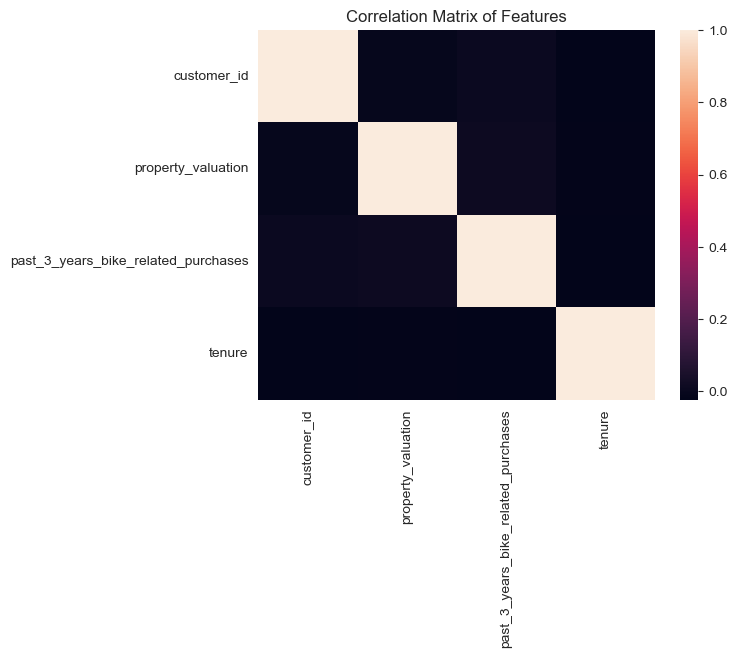

In [121]:
# Multicollinearity check
sns.heatmap(df_train.corr())
plt.title('Correlation Matrix of Features');

# Data Preprocessing

In [122]:
df_train.drop(columns='job_industry_category', inplace=True)
df_train.drop(columns='deceased_indicator', inplace=True)
df_train.drop(columns=['customer_id'], inplace=True)
df_train_copy=df_train.copy()

In [123]:
# Encode the target variables
df_train['Customer_segment']=df_train['Customer_segment'].replace({'Good':1, 'Bad':0})

In [124]:
# Ordinal encoding of categorical features
from sklearn.preprocessing import OrdinalEncoder
Ord_enc = OrdinalEncoder()
df_train[["AgeGroup","wealth_segment","state"]] = Ord_enc.fit_transform(df[["AgeGroup","wealth_segment","state"]])

In [125]:
# One-Hot Encoding of categorical features
# df_train['job_industry_category'] = df_train['job_industry_category'].astype('category')
# df_train['deceased_indicator'] = df_train['deceased_indicator'].astype('category')
df_train['owns_car'] = df_train['owns_car'].astype('category')
#df_train['state'] = df_train['state'].astype('category')
df_train['gender'] = df_train['gender'].astype('category')
useful_feat=df_train.columns
encode_feat=['owns_car','gender']
df_encode = pd.get_dummies(df_train[encode_feat], drop_first=True)
df_train.drop(columns=encode_feat, inplace=True)

In [126]:
df_X=pd.concat([df_train,df_encode], axis=1)
df_X.head()

property_valuation  past_3_years_bike_related_purchases  wealth_segment  \
0                  10                                   93             2.0   
1                  10                                   93             2.0   
2                  10                                   93             2.0   
3                  10                                   93             2.0   
4                  10                                   93             2.0   

   tenure  state  AgeGroup Customer_segment  owns_car_Yes  gender_Male  
0      11    1.0       1.0                1             1            0  
1      11    1.0       1.0                1             1            0  
2      11    1.0       1.0                1             1            0  
3      11    1.0       1.0                1             1            0  
4      11    1.0       1.0                1             1            0

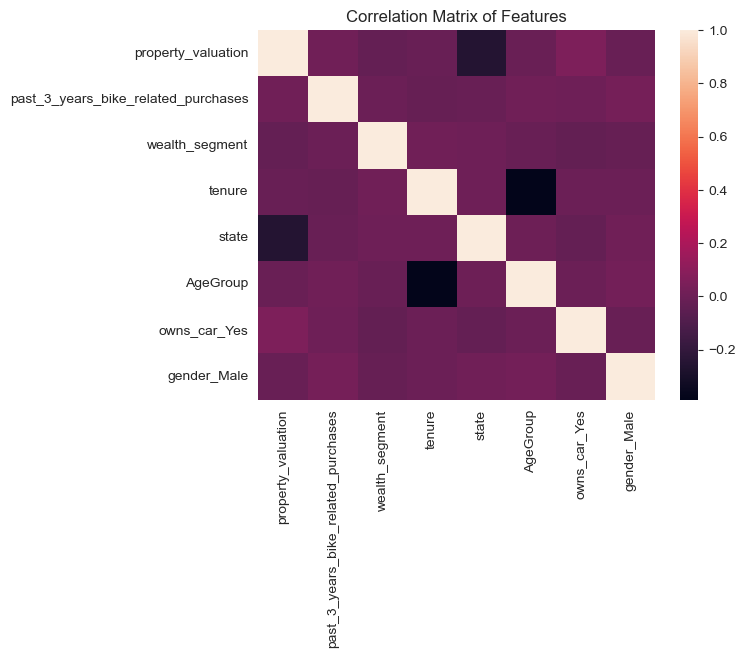

In [127]:
# Multicollinearity check
sns.heatmap(df_X.corr())
plt.title('Correlation Matrix of Features');

# Split

In [128]:
X = df_X.drop('Customer_segment', axis=1)
y = df_X['Customer_segment']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
clf = RandomForestClassifier(random_state=42)

In [133]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [135]:
y_pred = clf.predict(X_test)

In [136]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1520
           1       0.99      1.00      1.00      2346

    accuracy                           1.00      3866
   macro avg       1.00      1.00      1.00      3866
weighted avg       1.00      1.00      1.00      3866



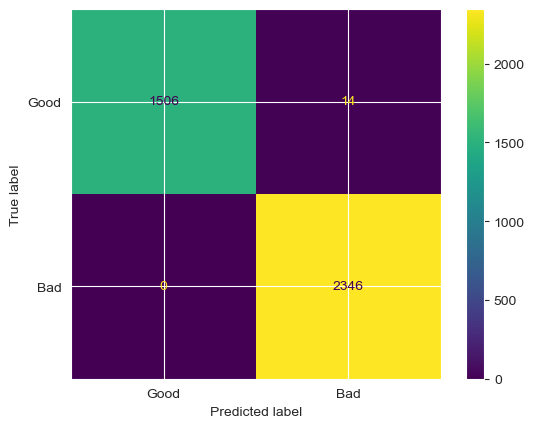

In [137]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Good','Bad'])
cmd.plot();

In [138]:
print(confusion_matrix(y_test, y_pred))

[[1506   14]
 [   0 2346]]


In [139]:
clf.feature_importances_

array([0.18126438, 0.34620729, 0.05047416, 0.2438495 , 0.0725027 ,
       0.0437628 , 0.02957717, 0.03236201])

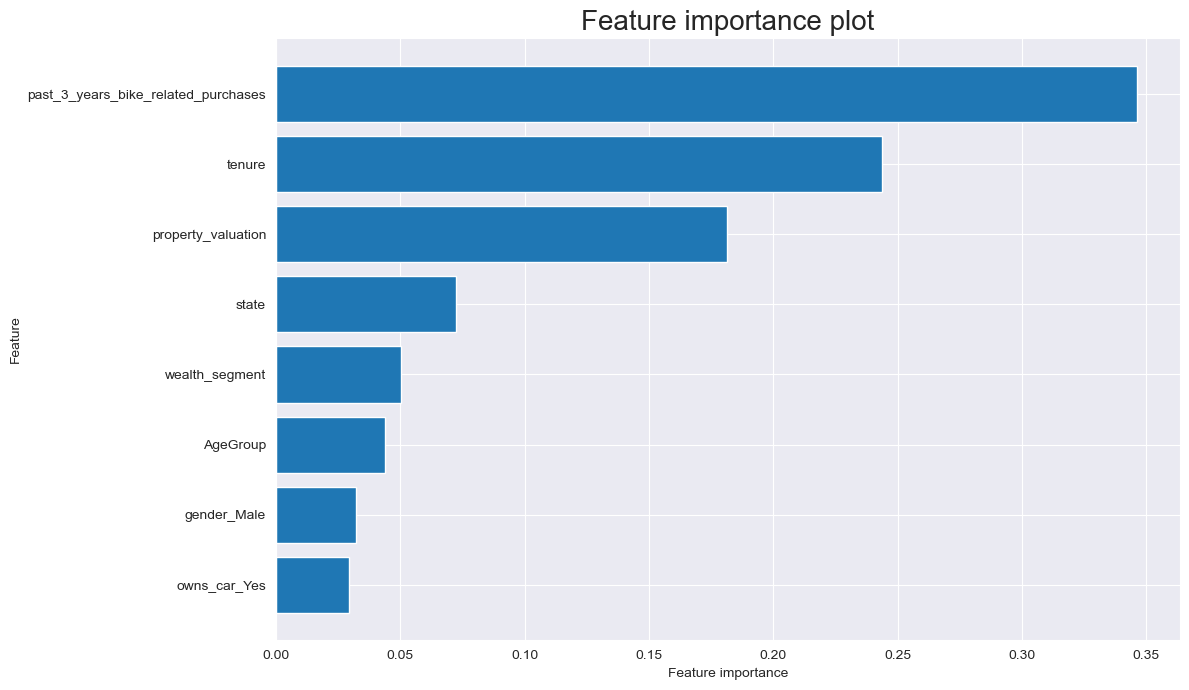

In [140]:
#Feature 
def plot_feature_importances_model(model,X):
    plt.figure(figsize=(12,7))
    n=len(X.columns)
    top_features=pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=True)
    plt.barh(range(n),top_features, align='center')
    plt.yticks(range(n),top_features.index)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature importance plot',size=20)
    plt.tight_layout()
    
plot_feature_importances_model(clf, X)

The data obtained from property_valuation, tenure, past_3_years_bike_related_purchases features are major determinant factors of whether the customer is a potentially good or bad one.

# Recommend New Costumers

In [141]:
NewCustomer_df.head()

0 first_name  last_name  gender  past_3_years_bike_related_purchases  \
1    Chickie    Brister    Male                                   86   
2      Morly     Genery    Male                                   69   
3    Ardelis  Forrester  Female                                   10   
4     Lucine      Stutt  Female                                   64   
5    Melinda     Hadlee  Female                                   34   

0        DOB                   job_title job_industry_category  \
1 1957-07-12             General Manager         Manufacturing   
2 1970-03-22         Structural Engineer              Property   
3 1974-08-28      Senior Cost Accountant    Financial Services   
4 1979-01-28  Account Representative III         Manufacturing   
5 1965-09-21           Financial Analyst    Financial Services   

0     wealth_segment deceased_indicator owns_car  ... state    country  \
1      Mass Customer                  N      Yes  ...   QLD  Australia   
2      Mass Customer                  N       No  ...   NSW  Australia   
3  Affluent Customer                  N       No  ...   VIC  Australia   
4  Affluent Customer                  N      Yes  ...   QLD  Australia   
5  Affluent Customer                  N       No  ...   NSW  Australia   

0 property_valuation   NaN     NaN     NaN       NaN  NaN  Rank     Value  
1                  6  0.56  0.7000  0.8750  0.743750  1.0     1  1.718750  
2                 11  0.89  0.8900  1.1125  0.945625  1.0     1  1.718750  
3                  5  1.01  1.0100  1.0100  1.010000  1.0     1  1.718750  
4                  1  0.87  1.0875  1.0875  1.087500  4.0     4  1.703125  
5                  9  0.52  0.5200  0.6500  0.650000  4.0     4  1.703125  

[5 rows x 23 columns]

In [142]:
NewCustomer_df=NewCustomer_df[NewCustomer_df['gender']!='U']

In [143]:
# Useful features will be selected from the features that are common to both the labelled dataset and the new dataset
useful_feat

Index(['property_valuation', 'owns_car', 'past_3_years_bike_related_purchases',
       'wealth_segment', 'tenure', 'state', 'gender', 'AgeGroup',
       'Customer_segment'],
      dtype='object')

In [144]:
df_test=NewCustomer_df[['property_valuation','owns_car', 'past_3_years_bike_related_purchases','wealth_segment', 'tenure', 'state', 'gender','DOB']]
df_test.head()

0  property_valuation owns_car  past_3_years_bike_related_purchases  \
1                   6      Yes                                   86   
2                  11       No                                   69   
3                   5       No                                   10   
4                   1      Yes                                   64   
5                   9       No                                   34   

0     wealth_segment tenure state  gender        DOB  
1      Mass Customer     14   QLD    Male 1957-07-12  
2      Mass Customer     16   NSW    Male 1970-03-22  
3  Affluent Customer     10   VIC  Female 1974-08-28  
4  Affluent Customer      5   QLD  Female 1979-01-28  
5  Affluent Customer     19   NSW  Female 1965-09-21

In [145]:
df_info(df=df_test)

data_type  null_count  \
0                                                                 
property_valuation                            int32           0   
owns_car                                     object           0   
past_3_years_bike_related_purchases           int32           0   
wealth_segment                               object           0   
tenure                                       object           0   
state                                        object           0   
gender                                       object           0   
DOB                                  datetime64[ns]           0   

                                     null_percentage %  unique_count  
0                                                                     
property_valuation                                 0.0            12  
owns_car                                           0.0             2  
past_3_years_bike_related_purchases                0.0           100  
wealth_segment                                     0.0             3  
tenure                                             0.0            22  
state                                              0.0             3  
gender                                             0.0             2  
DOB                                                0.0           958

In [146]:
# Correct the data type for tenure column
df_test['tenure']=df_test['tenure'].astype('int')

In [147]:
df_test['DOB'].describe()

count                     983
unique                    958
top       1998-02-05 00:00:00
freq                        2
first     1938-06-08 00:00:00
last      2002-02-27 00:00:00
Name: DOB, dtype: object

In [148]:
#Fill the null DOB with most frequent DOB
df_test['DOB'].fillna('1998-02-05 00:00:00', inplace=True)
df_test['DOB'] = pd.to_datetime(df_test['DOB'], format='%m%d%y')  

In [149]:
df_test['DOB'].isna().sum()

0

In [150]:
# Create Age groups for the new column
now = pd.Timestamp('now')
df_test['DOB'] = pd.to_datetime(df_test['DOB'], format='%m%d%y')    # 1
df_test['DOB'] = df_test['DOB'].where(df_test['DOB'] < now, df_test['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df_test['age'] = (now - df_test['DOB']).astype('<m8[Y]')    # 3
df_test['age'] = df_test['age'].astype('int')

bins= [0,39,59,99]
labels = ['Young Adult','Middle Aged Adult','Old Adults']
df_test['AgeGroup'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)
df_test.drop(columns=['DOB','age'], inplace=True)
print (df['AgeGroup'].value_counts())

Middle Aged Adult    9892
Young Adult          6043
Old Adults           3392
Name: AgeGroup, dtype: int64


In [151]:
df_info(df=df_test)

data_type  null_count  null_percentage %  \
0                                                                              
property_valuation                      int32           0                0.0   
owns_car                               object           0                0.0   
past_3_years_bike_related_purchases     int32           0                0.0   
wealth_segment                         object           0                0.0   
tenure                                  int32           0                0.0   
state                                  object           0                0.0   
gender                                 object           0                0.0   
AgeGroup                             category           0                0.0   

                                     unique_count  
0                                                  
property_valuation                             12  
owns_car                                        2  
past_3_years_bike_related_purchases           100  
wealth_segment                                  3  
tenure                                         22  
state                                           3  
gender                                          2  
AgeGroup                                        3

In [152]:
df_test_copy=df_test.copy()

In [153]:
# Perform one hot encoding and ordinal encoding of the categorical columns
Ord_enc = OrdinalEncoder()
df_test[["AgeGroup","wealth_segment","state"]] = Ord_enc.fit_transform(df_test[["AgeGroup","wealth_segment","state"]])

df_test['owns_car'] = df_test['owns_car'].astype('category')
#df_test['state'] = df_test['state'].astype('category')
df_test['gender'] = df_test['gender'].astype('category')
useful_feat=df_test.columns
encode_feat=['owns_car','gender']
df_encode = pd.get_dummies(df_test[encode_feat], drop_first=True)
df_test.drop(columns=encode_feat, inplace=True)
df_X_test=pd.concat([df_test,df_encode], axis=1)

In [154]:
df_X_test.head()

property_valuation  past_3_years_bike_related_purchases  wealth_segment  \
1                   6                                   86             2.0   
2                  11                                   69             2.0   
3                   5                                   10             0.0   
4                   1                                   64             0.0   
5                   9                                   34             0.0   

   tenure  state  AgeGroup  owns_car_Yes  gender_Male  
1      14    1.0       1.0             1            1  
2      16    0.0       0.0             0            1  
3      10    2.0       0.0             0            0  
4       5    1.0       0.0             1            0  
5      19    0.0       0.0             0            0

In [155]:
df_X_test.columns

Index(['property_valuation', 'past_3_years_bike_related_purchases',
       'wealth_segment', 'tenure', 'state', 'AgeGroup', 'owns_car_Yes',
       'gender_Male'],
      dtype='object')

In [156]:
customer_rec=clf.predict(df_X_test)

In [157]:
NewCustomer_df['Recomendation']=customer_rec

In [158]:
NewCustomer_df['Recomendation']=NewCustomer_df['Recomendation'].replace({1:'Good',0:'Bad'})
df_test_copy['Recommendation'] = NewCustomer_df['Recomendation']

In [159]:
NewCustomer_df.head()

0 first_name  last_name  gender  past_3_years_bike_related_purchases  \
1    Chickie    Brister    Male                                   86   
2      Morly     Genery    Male                                   69   
3    Ardelis  Forrester  Female                                   10   
4     Lucine      Stutt  Female                                   64   
5    Melinda     Hadlee  Female                                   34   

0        DOB                   job_title job_industry_category  \
1 1957-07-12             General Manager         Manufacturing   
2 1970-03-22         Structural Engineer              Property   
3 1974-08-28      Senior Cost Accountant    Financial Services   
4 1979-01-28  Account Representative III         Manufacturing   
5 1965-09-21           Financial Analyst    Financial Services   

0     wealth_segment deceased_indicator owns_car  ...    country  \
1      Mass Customer                  N      Yes  ...  Australia   
2      Mass Customer                  N       No  ...  Australia   
3  Affluent Customer                  N       No  ...  Australia   
4  Affluent Customer                  N      Yes  ...  Australia   
5  Affluent Customer                  N       No  ...  Australia   

0 property_valuation   NaN     NaN     NaN       NaN  NaN  Rank     Value  \
1                  6  0.56  0.7000  0.8750  0.743750  1.0     1  1.718750   
2                 11  0.89  0.8900  1.1125  0.945625  1.0     1  1.718750   
3                  5  1.01  1.0100  1.0100  1.010000  1.0     1  1.718750   
4                  1  0.87  1.0875  1.0875  1.087500  4.0     4  1.703125   
5                  9  0.52  0.5200  0.6500  0.650000  4.0     4  1.703125   

0  Recomendation  
1           Good  
2            Bad  
3            Bad  
4            Bad  
5            Bad  

[5 rows x 24 columns]

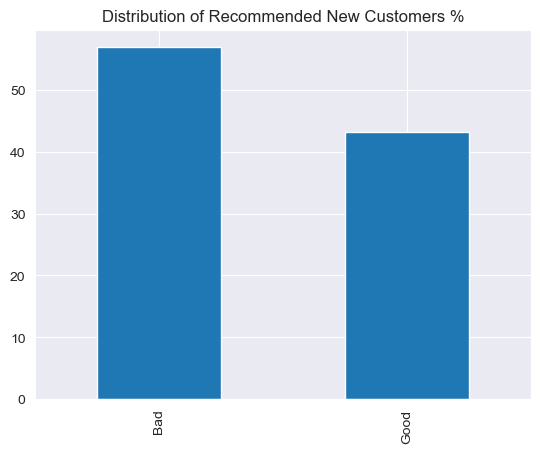

In [160]:
(NewCustomer_df['Recomendation'].value_counts(normalize=True)*100).plot(
    kind='bar', title='Distribution of Recommended New Customers %'
);

In [161]:
# Visualization of customers
Sc=StandardScaler()
Customers_scaled=Sc.fit_transform(df_X_test)
pca=PCA(n_components=3)
pca_data=pd.DataFrame(pca.fit_transform(Customers_scaled),columns=['PC1','PC2','PC3'])

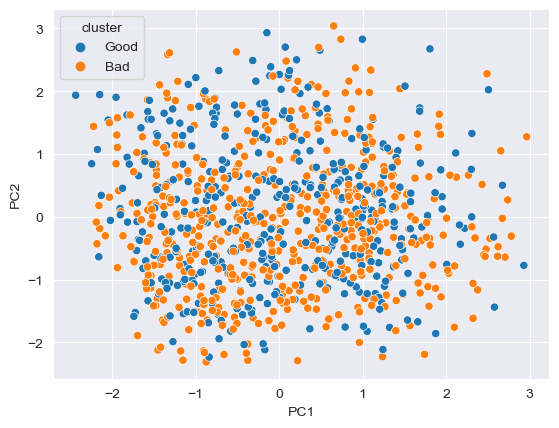

In [162]:
pca_data['cluster'] = NewCustomer_df['Recomendation']
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data);

In [163]:
# Export final excel sheets for Power BI presentation
df_train_copy.to_excel('Customer_Recommendation_data.xlsx')
df_test_copy.to_excel('Customer_Recommendation_results.xlsx')

In [164]:
df_test_copy.shape

(983, 9)

In [165]:
df_train_copy.shape

(19327, 9)

In [166]:
df_test_copy.columns

Index(['property_valuation', 'owns_car', 'past_3_years_bike_related_purchases',
       'wealth_segment', 'tenure', 'state', 'gender', 'AgeGroup',
       'Recommendation'],
      dtype='object', name=0)

In [167]:
df_train_copy.columns

Index(['property_valuation', 'owns_car', 'past_3_years_bike_related_purchases',
       'wealth_segment', 'tenure', 'state', 'gender', 'AgeGroup',
       'Customer_segment'],
      dtype='object')